# Google Playstore Data

### Complete Exploratory Data Analysis 

About Dataset

> **Description:**
> Dataset is take from Kaggle from following [Link](https://www.kaggle.com/lava18/google-play-store-apps)
> 
Instructions for citation:

If you use this dataset anywhere in your work, kindly cite as the below:

L. Gupta, "Google Play Store Apps," Feb 2019. [Online]. [Available:](https://www.kaggle.com/lava18/google-play-store-apps) 

Context

While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

Content

Each app (row) has values for catergory, rating, size, and more.

Acknowledgements

This information is scraped from the Google Play Store. This app information would not be available without it.

Inspiration

The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!

# 1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
# "matplotlib inline" This works best inside of VS Code to show interactive plots

# 2. Data Loading and Exploration | Cleaning

- Load the csv file with pandas
- creating the dataframe and understanding the data present in the dataset using pandas
- Dealing with the missing data, outliers and the incorrect records

- Let's load the csv file

In [4]:
df = pd.read_csv('./data/googleplaystore.csv')


- Viewing the first five Rows of the data

In [5]:
df.head(5)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device
1,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5M,0+,Paid,$1.49,Everyone,Personalization,11-Jul-18,1.1,4.2 and up
2,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7M,0+,Paid,$13.99,Teen,Social,28-Jul-17,3.4.4.3.3,4.1 and up
3,AP Series Solution Pro,FAMILY,NaN,0,7.4M,0+,Paid,$1.99,Everyone,Education,30-Jul-17,1.3,4.0 and up
4,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33M,0+,Paid,$2.99,Everyone,Education,15-Apr-16,1,3.0 and up


> **Note:** Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands:
  

In [6]:

pd.set_option('display.max_columns', None) # This is to display all the columns in the dataframe
pd.set_option('display.max_rows',None)  # This is to display all the rows in the dataframe



In [7]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

- let's see the exact column names which can be easily copied later on from Google Playstore Dataset

In [8]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

- let's have a look on the shape of the dataset

In [9]:
df.shape

(10841, 13)

Not enough, let's have a look on the columns and their data types using detailed info function

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


# Observations
---
1. There are 10841 rows and 13 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
      - `'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android ver'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
    - `'Size', 'Installs', 'Price'`

In [11]:
df.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


# Observations:
---
- We have only 2 columns as numeric data type, rest all are object data type ( according to python), but we can see that `'Size', 'Installs', 'Price'` are also numeric, we must convert them to numeric data type in data wrangling process.
---

- Let's clean the `Size' column first

In [12]:
# check for null values
df['Size'].isnull().sum()

np.int64(0)

- No null values, we are good to go

In [13]:
# Check unique values
df['Size'].unique()

array(['Varies with device', '5.5M', '8.7M', '7.4M', '33M', '5.4M',
       '5.9M', '10M', '2.1M', '1.2M', '56M', '3.2M', '2.6M', '1.4M',
       '40M', '13M', '76M', '3.8M', '3.3M', '3.9M', '32M', '19M', '15M',
       '21M', '3.0M', '53M', '46M', '55M', '2.7M', '5.8M', '14M', '98M',
       '96M', '9.8M', '50M', '5.1M', '51M', '29M', '37M', '18M', '77M',
       '27M', '17M', '5.0M', '1.8M', '7.3M', '61M', '23M', '6.1M', '8.2M',
       '41M', '544k', '44M', '7.0M', '82M', '28M', '12M', '60M', '11M',
       '6.8M', '25M', '3.1M', '39M', '22M', '9.0M', '43M', '2.4M', '7.9M',
       '5.2M', '31M', '64M', '49M', '35M', '7.2M', '1.5M', '20M', '8.4M',
       '2.8M', '6.5M', '30M', '1.7M', '24M', '5.6M', '2.5M', '8.3M',
       '36M', '26M', '292k', '78M', '9.2M', '95M', '2.2M', '85M', '38M',
       '45M', '34M', '16M', '84M', '47M', '253k', '9.1M', '9.5M', '58M',
       '54M', '71M', '5.3M', '8.8M', '83M', '69M', '67M', '3.6M', '62M',
       '2.9M', '63M', '201k', '4.3M', '6.6M', '48M', '72M', '

- there are several uniques values in the `Size` column, we have to first make the unit into one common unit from M and k to bytes, and then remove the M and k from the values and convert them into numeric data type.

In [14]:
# Find the values in size column which has 'M' in it
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

df['Size'].head()

0    Varies with device
1                  5.5M
2                  8.7M
3                  7.4M
4                   33M
Name: Size, dtype: object

In [15]:
# Find the vlaues in size column which has 'k' in it
df['Size'].loc[ df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [16]:
# Find the values in size column which has 'Varies with device' in it
df['Size'].loc[ df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [17]:
# Total Values in Size column
df['Size'].value_counts().sum()

np.int64(10841)

In [18]:
# Taking sum of all the values in size column which has 'M', 'k' and 'Varies with device' in it
8830+ 316 + 1695

10841

- We have 8830 values in `M` units
- We have 316 values in `k` units
- We have 1695 values in `Varies with device`

> Let's convert the `M` and `k` units into bytes and then remove the `M` and `k` fromt he values and convert them into numeric datatype.

In [19]:
# Convert the size colum to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
# this function will convert the size column to numeric

def convert_size(size):
    # add function details here
    '''
    This function will convert the size column to numeric by multiplying the values with 1024 if it has 'k' in it and 1024*1024 if it has 'M' in it
    '''

    if isinstance(size, str):
        if 'M' in size:
            return float(size.replace('M', '')) *1024 * 1024
        elif 'k' in  size:
            return float(size.replace('k', '')) * 1024
        elif 'Varies with device' in size:
            return np.nan

df['Size'] = df['Size'].apply(convert_size)



In [20]:
# rename the column name from 'Size' to 'Size_in_bytes'
df.rename(columns = {'Size': 'Size_in_bytes'}, inplace = True)

In [21]:
# making a new column 'Size_in_Mb' which will have the size in Mb
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/ (1024 * 1024))

- Now we have converted every value into bytes and removed the `M` and `k` from the values and converted them into numeric data type.
- `Varies with device` was a string value, therefore we intentionally converted them into null vlaues, which we can fill later on according to out needs.
---
- Let's have a look on the `Installs` column

In [22]:
# check the unique values in the Installs column
df["Installs"].unique() 

array(['0', '0+', '1,000,000,000+', '1,000,000+', '1,000+', '1+',
       '10,000,000+', '10,000+', '10+', '100,000,000+', '100,000+',
       '100+', '5,000,000+', '5,000+', '5+', '50,000,000+', '50,000+',
       '50+', '500,000,000+', '500,000+', '500+'], dtype=object)

In [23]:
# let's have a values counts
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [24]:
# Find how many values has '+' in it
df['Installs'].loc[df['Installs'].str.contains('\+')].value_counts().sum()

np.int64(10840)

In [25]:
# Total values in Installs column
df['Installs'].value_counts().sum()

np.int64(10841)

- The only problem I see here is the + sign in the values, let's remove them and convert the column into numeric data type.
- The total values in the `Installs` column are `10841` and there are no null values in the column.
- However, one vlaue 0 has no plus sign
- let's remove the plus sign `+` and `,` from the values and convert them into numeric data type.

In [26]:
# remove the plus sign from install column and convert it to numeric
df['Installs'] = df['Installs'].apply( lambda x : x.replace('+', '') if '+' in str(x) else x)
# also remove the commas from the install column
df['Installs'] = df['Installs'].apply( lambda x : x.replace(',', '') if ',' in str(x) else x)
# convert the install column to numeric (integers because this is the numeric of installs/count)
df['Installs'] = df['Installs'].apply( lambda x: int(x))

- Let's verify if the dtypes has been changes and the + and , sign has been removed

In [27]:
df.head() # check the head of the dataframe

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb
0,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,28-Jun-18,Varies with device,Varies with device,NaN
1,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5767168.0,0,Paid,$1.49,Everyone,Personalization,11-Jul-18,1.1,4.2 and up,5.5
2,Ak Parti Yardım Toplama,SOCIAL,NaN,0,9122611.2,0,Paid,$13.99,Teen,Social,28-Jul-17,3.4.4.3.3,4.1 and up,8.7
3,AP Series Solution Pro,FAMILY,NaN,0,7759462.4,0,Paid,$1.99,Everyone,Education,30-Jul-17,1.3,4.0 and up,7.4
4,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,34603008.0,0,Paid,$2.99,Everyone,Education,15-Apr-16,1,3.0 and up,33.0


In [28]:
df['Installs'].dtype # this will show the data type of the column

dtype('int64')

- We can generate a new columns based on the installation values, which will be helpful in our analysis.

In [29]:
df['Installs'].max() # this will show the value counts of the column

np.int64(1000000000)

In [30]:
# making a new column called "Installs_category" which will have the category of the instlals
bins = [-1, 0, 10, 1000, 10000, 100000, 1000000, 10000000, 1000000000]
labels = ['no', 'Very low', 'Low', 'Moderate', "More than moderate", "High", 'Very High', "Top Notch"]
df['Installs_category'] = pd.cut(df['Installs'], bins = bins, labels = labels)

In [31]:
df['Installs_category'].value_counts() # check the value counts of the new column

Installs_category
Low                   2162
High                  2118
Very High             2004
More than moderate    1648
Moderate              1531
Top Notch              828
Very low               535
no                      15
Name: count, dtype: int64

- Let's have a look on the Price column

In [32]:
# check the unique values in the 'Price' column
df["Price"].unique()

array(['0', '$1.49 ', '$13.99 ', '$1.99 ', '$2.99 ', '$154.99 ', '$3.99 ',
       '$200.00 ', '$30.99 ', '$394.99 ', '$399.99 ', '$2.49 ', '$0.99 ',
       '$5.99 ', '$6.99 ', '$4.99 ', '$9.99 ', '$379.99 ', '$29.99 ',
       '$15.46 ', '$10.99 ', '$2.56 ', '$33.99 ', '$19.99 ', '$8.49 ',
       '$14.99 ', '$4.84 ', '$1.29 ', '$7.49 ', '$1.50 ', '$1.70 ',
       '$1.61 ', '$37.99 ', '$16.99 ', '$4.49 ', '$5.49 ', '$3.08 ',
       '$7.99 ', '$79.99 ', '$4.29 ', '$19.40 ', '$3.49 ', '$10.00 ',
       '$74.99 ', '$109.99 ', '$28.99 ', '$400.00 ', '$389.99 ',
       '$299.99 ', '$3.28 ', '$24.99 ', '$1.20 ', '$11.99 ', '$1.59 ',
       '$2.95 ', '$1.97 ', '$17.99 ', '$18.99 ', '$12.99 ', '$2.59 ',
       '$3.90 ', '$2.50 ', '$3.04 ', '$2.00 ', '$25.99 ', '$46.99 ',
       '$4.80 ', '$1.96 ', '$89.99 ', '$3.61 ', '$6.49 ', '$3.95 ',
       '$8.99 ', '$9.00 ', '$2.90 ', '$4.59 ', '$39.99 ', '$3.02 ',
       '$3.88 ', '$14.00 ', '$5.00 ', '$19.90 ', '$1.26 ', '$4.60 ',
       '$1.00 ', '$4.77

In [33]:
df['Price'].isnull().sum()

np.int64(0)

- No Null Values

In [34]:
df['Price'].value_counts() # check the value counts of the 'Price' column

Price
0           10041
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$7.99           7
$29.99          7
$24.99          7
$3.49           7
$19.99          6
$5.49           6
$8.99           5
$12.99          5
$11.99          5
$6.49           5
$16.99          3
$10.00          3
$2.00           3
$1.00           3
$17.99          2
$39.99          2
$9.00           2
$3.95           2
$8.49           2
$79.99          2
$1.70           2
$7.49           2
$10.99          2
$33.99          2
$13.99          2
$200.00         1
$379.99         1
$154.99         1
$394.99         1
$30.99          1
$1.29           1
$4.84           1
$2.56           1
$15.46          1
$74.99          1
$109.99         1
$400.00         1
$28.99          1
$1.20           1
$19.40          1
$3.08           1
$4.2

- We need to confirm if the vlaues in the `Price` column are only with $ sign or not

In [35]:
# count the values having $ in the 'Price' Column
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [36]:
# This code counts the number of values in the 'Price' Column which contains 0 but does not contain $ sign
df['Price'].loc[ ( df['Price'].str.contains('0')) & ( ~ df['Price'].str.contains('\$'))].value_counts().sum()

np.int64(10041)

- Now we can confirm that the only currency used is $ in the `Price` column or 0 value, as `800+10041 = 10841 Total values`
- The only problem is $ sign let's remove it and convert the column into numeric data type.

In [37]:
# remove the dollar sign from the price column and convert it to numeric
df['Price'] = df['Price'].apply( lambda x: x.replace('$', '') if '$' in str(x) else x)
# convert the price column to numeric (float because this is the price)
df['Price'] = df['Price'].apply( lambda x: float(x))

In [38]:
df['Price'].dtype # this will show the data type of the column

dtype('float64')

In [39]:
# using f string to print the min, max and average price of the apps
print(f'Min price is: {df['Price'].min()} $')
print(f'Max price is: {df['Price'].max()} $')
print(f'Average price is: {df['Price'].mean()} $')

Min price is: 0.0 $
Max price is: 400.0 $
Average price is: 1.0272733142699013 $


# 2.1 Descriptive Statistics

In [40]:
df.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


# **Observations:**
---
- Now, we have only 6 columns as numeric data type.
- We can observe their descriptive statistics. and make tons of observations as per our hypothesis.
- We can see that the `Rating` column has a minimum value of `1` and a maximum value of `5`, which is the range of rating, and the mean is `4.19` which is a good rating. On an average people give this rating.
- We can see that the `Reviews` column has a minimum value of `0` and a maximum value of `78,158,306` 78+ Millions, which is the reviews to the apps. But it does not make sense to us, as we have different categories of apps.
- Similarly, we can observe the other columns as well.

Therefore, the most important thing is to classify as app based on the correlation matrix and then observe the descriptive statistics of the app category and number of installs, reviews, ratings, etc.

---

## But even before that we have to think about the missing values in the dataset.

# **2.2 Dealing with the missing values**
Dealing with the missing values is one of the most important part of the data wrangling process, we must deal with the missing values in order to get correct insights fromt the data.

---
- Let's have a look on the missing values in the dataset

In [41]:
df.isnull().sum() # this will show the number of null values in each column

App                     0
Category                1
Rating               1474
Reviews                 0
Size_in_bytes        1695
Installs                0
Type                    1
Price                   0
Content Rating          0
Genres                  1
Last Updated            0
Current Ver             8
Android Ver             2
Size_in_Mb           1695
Installs_category       0
dtype: int64

In [42]:
df.isnull().sum().sort_values(ascending = False) # This will show the number of null values in each column in descending order

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
Installs_category       0
dtype: int64

In [43]:
df.isnull().sum().sum() # this will show the total number of null values in the dataframe

np.int64(4877)

In [44]:
(df.isnull().sum()/ len(df) * 100). sort_values(ascending =False) # This will show the percentage of null values in each column in descending order

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Type                  0.009224
Category              0.009224
Genres                0.009224
Installs              0.000000
App                   0.000000
Reviews               0.000000
Last Updated          0.000000
Content Rating        0.000000
Price                 0.000000
Installs_category     0.000000
dtype: float64

- Let's plot the missing values in the dataset

<Axes: >

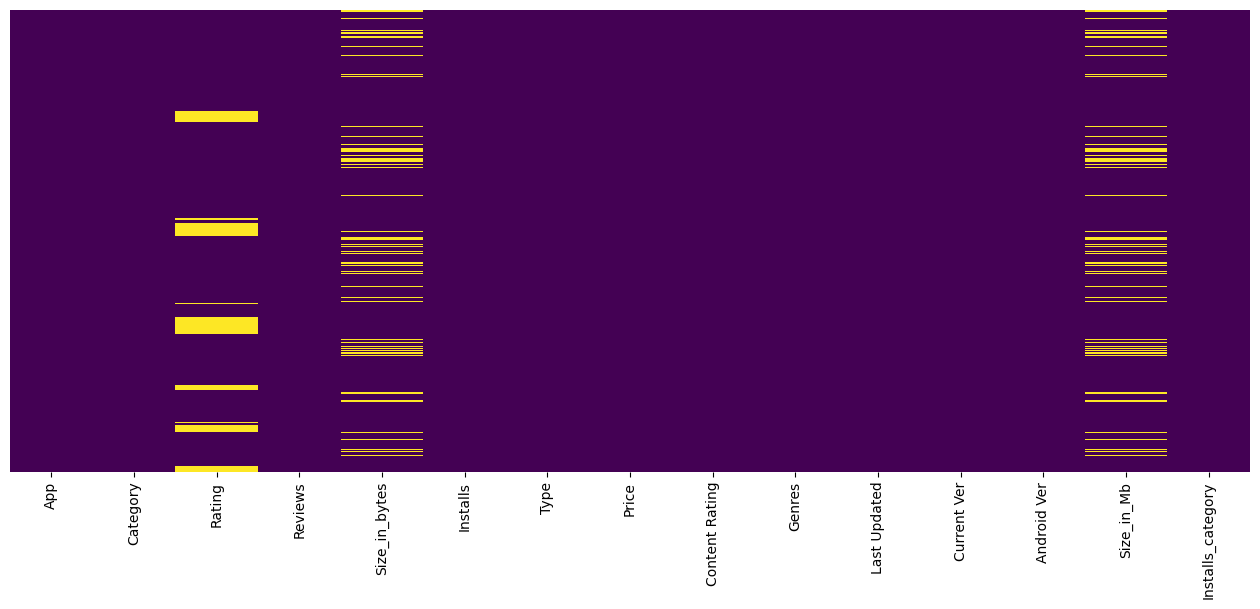

In [45]:
# make a figure size
plt.figure(figsize = (16, 6))
# plot the null values in each column
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap ="viridis")

- There is another way, let's plot the missing values by percentage

Text(0.5, 1.0, 'Percentage of missing values in each column')

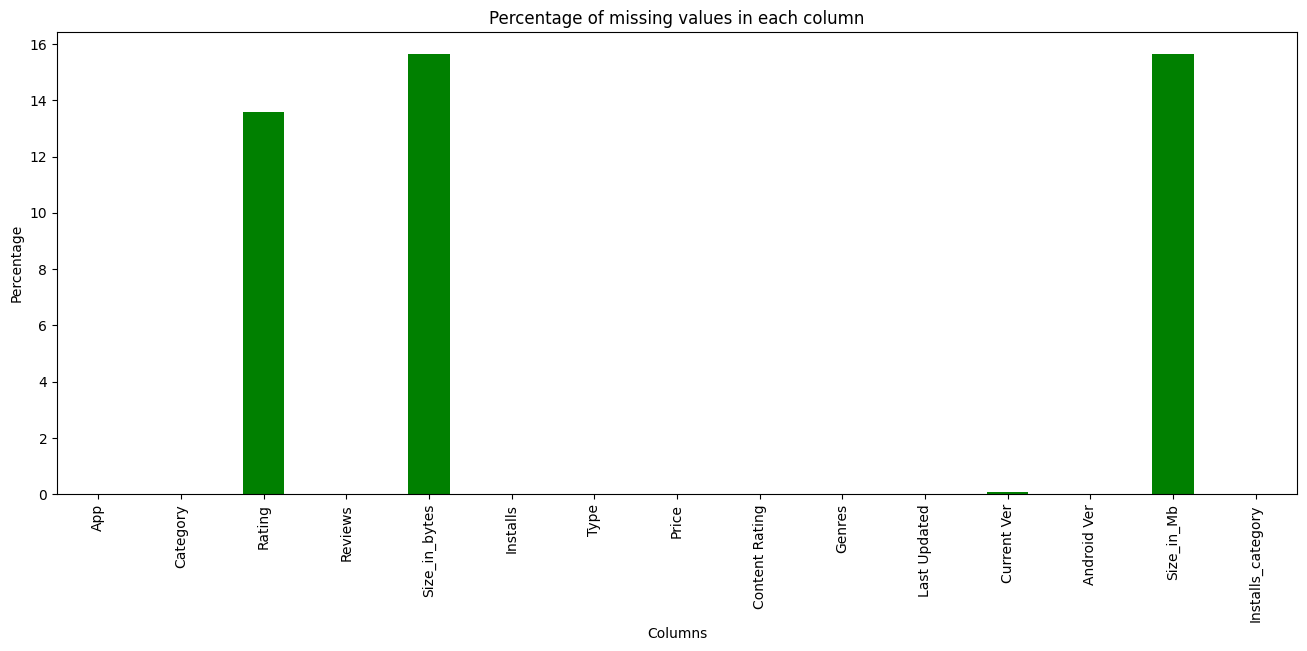

In [46]:
# make figure size
plt.figure(figsize = (16, 6))
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/ len(df) * 100
missing_percentage.plot(kind='bar', color = 'green')
# add the labels
plt.xlabel("Columns")
plt.ylabel('Percentage')
plt.title("Percentage of missing values in each column")

- Let's plot the missing values other than 'Rating', 'Size_in_bytes' and 'Size_in_Mb' column
- We have missing percentage columns other than rating having less than one percent of missing values, we will plot them as folows:

Text(0.5, 1.0, 'Percentage of mIssing Values in each Column without Rating column')

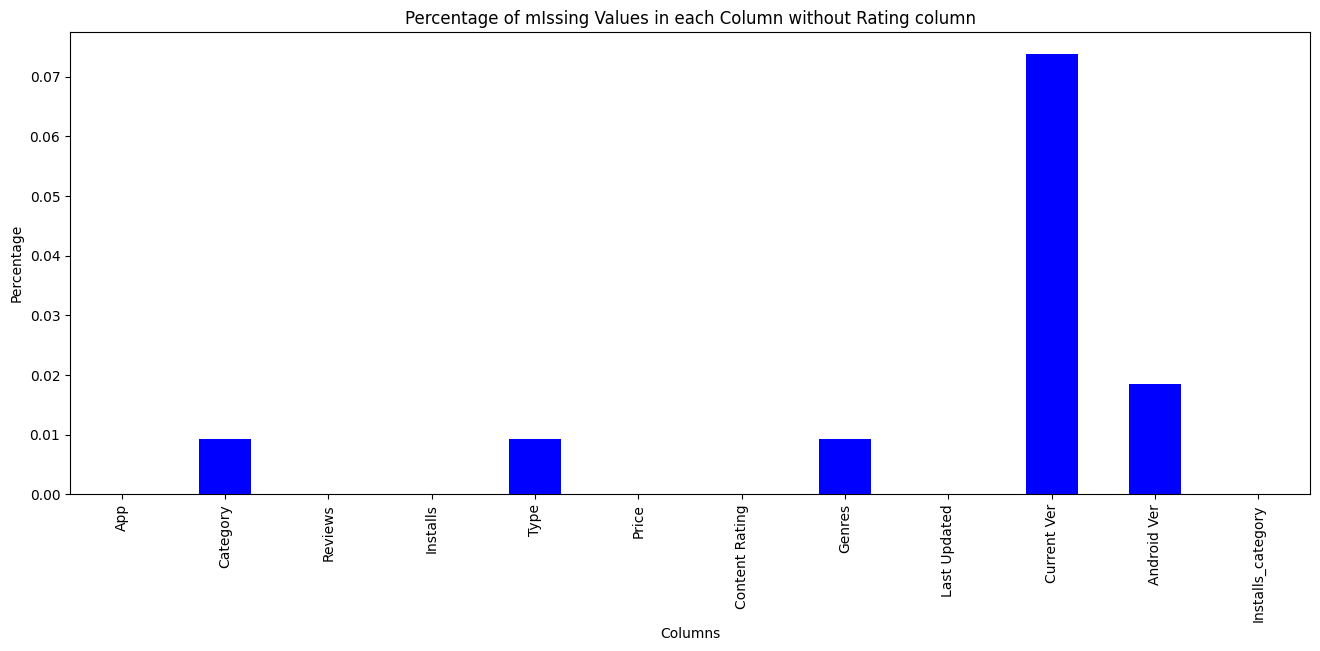

In [47]:
plt.figure(figsize = (16,6)) # make figure size
missing_percentage[missing_percentage <1 ].plot(kind = 'bar', color = 'blue') # plot the missing percentage of the columns which have less than 1% missing values
plt.xlabel('Columns') # add the x-axis labels
plt.ylabel('Percentage') # add the labels for y-axis
plt.title("Percentage of mIssing Values in each Column without Rating column") # add the title for the plot

In [48]:
df.isnull().sum().sort_values(ascending = False) # this will show the number of null values in each column in descending order

Size_in_bytes        1695
Size_in_Mb           1695
Rating               1474
Current Ver             8
Android Ver             2
Type                    1
Category                1
Genres                  1
Installs                0
App                     0
Reviews                 0
Last Updated            0
Content Rating          0
Price                   0
Installs_category       0
dtype: int64

In [49]:
(df.isnull().sum()/len(df) * 100).sort_values(ascending=False) # this will show the percentage of null values in each column in descending order

Size_in_bytes        15.635089
Size_in_Mb           15.635089
Rating               13.596532
Current Ver           0.073794
Android Ver           0.018448
Type                  0.009224
Category              0.009224
Genres                0.009224
Installs              0.000000
App                   0.000000
Reviews               0.000000
Last Updated          0.000000
Content Rating        0.000000
Price                 0.000000
Installs_category     0.000000
dtype: float64

# Observations:
---
- We have 1695 missing values in the `Size_in_bytes` and `Size_in_Mb` columns, which is 15.6% of the total values in the column.
- We have 1474 missing vlaues in the `Rating` column, which is 13.6% of the total values in the column.
- We have 8 missing value in the `Current Ver` column, which is 0.07% of the total values in the column.
- We have 2 missing values in the `Android Ver` column, which is 0.01% of the total values in the column.
- We have only 1 missing value in `Category, Type` and `Genres` columns, which is 0.009% of the total values in the column.

## 2.3 Dealing with the missing values
- We can not impute the `Rating` column as is directly linked with the installation column. to test this Hypothesis we need to plot the `Rating` column with the `Installs` and `Size` columns and statistically test it using `pearson correlation test`.
---
- Let's runt the correlations

In [50]:
df.describe() # These are numeric columns

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
count,9367.000000,1.084100e+04,9.146000e+03,1.084100e+04,10841.000000,9146.000000
mean,4.191513,4.441119e+05,2.255921e+07,1.546291e+07,1.027273,21.514141
std,0.515735,2.927629e+06,2.368595e+07,8.502557e+07,15.948971,22.588679
min,1.000000,0.000000e+00,8.704000e+03,0.000000e+00,0.000000,0.008301
25%,4.000000,3.800000e+01,5.138022e+06,1.000000e+03,0.000000,4.900000
50%,4.300000,2.094000e+03,1.363149e+07,1.000000e+05,0.000000,13.000000
75%,4.500000,5.476800e+04,3.145728e+07,5.000000e+06,0.000000,30.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


<Axes: >

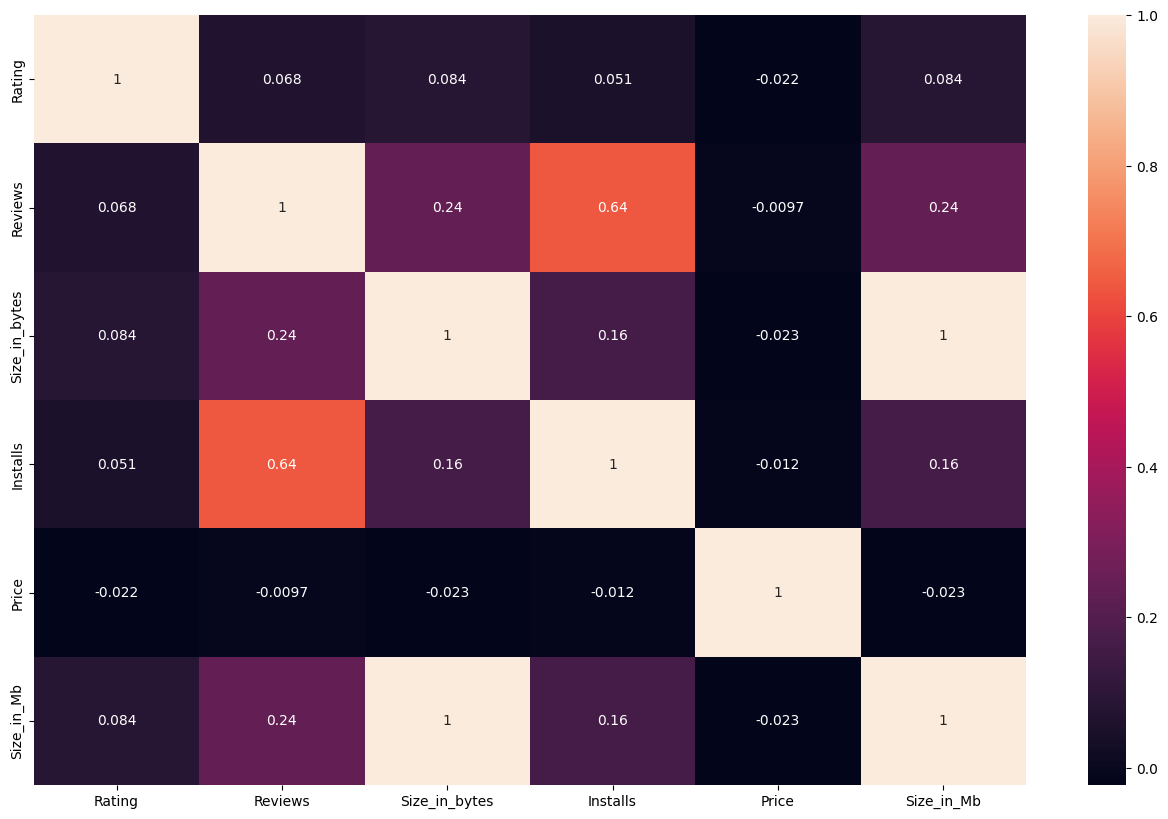

In [51]:
# Make a correlation matrix of numeric columns
plt.figure(figsize = (16, 10)) # make figure size

numeric_cols = [ 'Rating', 'Reviews', 'Size_in_bytes', 'Installs', 'Price', 'Size_in_Mb']
sns.heatmap(df[numeric_cols].corr(), annot= True) # plot the correlation matrix

In [52]:
# We can also calculate the correlation matrix using the pandas

df[numeric_cols].corr() # this will show the correlation matrix of the numeric columns

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_Mb
Rating,1.000000,0.068147,0.084098,0.051393,-0.021851,0.084098
Reviews,0.068147,1.000000,0.238218,0.643123,-0.009666,0.238218
Size_in_bytes,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000
Installs,0.051393,0.643123,0.164794,1.000000,-0.011688,0.164794
Price,-0.021851,-0.009666,-0.023000,-0.011688,1.000000,-0.023000
Size_in_Mb,0.084098,0.238218,1.000000,0.164794,-0.023000,1.000000


In [53]:
# We can calculate the pearson correlation coefficient using scipy as well as follows

# this is to install scipy if you have not done it before
# pip install scipy
from scipy import stats

# remove rows containing Nan or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# calculate Pearson's R between Rating and Installs
pearson_r, _ = stats.pearsonr(df_clean['Reviews'], df_clean['Installs'])
print(f'Pearson\'s R between Reviews and Installs: {pearson_r:.4f}')

Pearson's R between Reviews and Installs: 0.6262


# Observations

- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `Reviews` column has a high correlation with the `Installs` column, which is 0.64 according to corr(). Which is quite good.
    - This shows that the more the reviews the more the installs are for one app. If in any case we need to impute reviews we have to think of number of install.
        - If we have an app with `2` installs and we imputer the reviews with `1000` or via average reviews then it will be wrong.
- Installs is slightly correlated with `Size_in_Mb` or ``Size_in_bytes``, which is `0.16`, this also shows us the importance of size and Installs. But we can not depnend on it as the Pearson correlation is very low.
---

- Before going ahead, let's remove the rows with missing values in the `Current Ver, Android ver, Category, Type` and `Genre` columns, as they are very less in number and will not affect our analysis.

In [54]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(df)}")

Length of the dataframe before removing null values: 10841


In [55]:
# remove the rows having null values in the 'Current Ver', 'Android ver', Category', 'Type' and 'Genre'ArithmeticError
df.dropna(subset = ['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace = True)

In [56]:
# length after removing null values
print(f'Length of the dataframe after removing null values: {len(df)}')

Length of the dataframe after removing null values: 10829


- we have removed 12 rows having nulll values in the Current ver, Android ver, Category, Type and Genre columns

In [57]:
# let's check the null values again
df.isnull().sum().sort_values(ascending = False)

Size_in_bytes        1694
Size_in_Mb           1694
Rating               1469
Category                0
Reviews                 0
Installs                0
App                     0
Type                    0
Price                   0
Genres                  0
Content Rating          0
Last Updated            0
Current Ver             0
Android Ver             0
Installs_category       0
dtype: int64

# Observations

- Only `Rating` and `Size_in_bytes` or `Size_in_Mb` columns are left with missing values.
    - We know that we have to be carefull while dealing with `Rating` column, as it is directly linked with the `Installs` column.
    - In size columns we already know about `Varies with device` values, which we have converted into null values, we do not need to impute at the moment, as every app has different size and nobody can predict that as nearly as possible.
---

In [58]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size_in_bytes', 'Installs',
       'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated',
       'Current Ver', 'Android Ver', 'Size_in_Mb', 'Installs_category'],
      dtype='object')

In [59]:
# Use groupby function to find the trend of Rating in each Installs_category
df.groupby("Installs_category")['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Installs_category,,,,,,,,
no,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Very low,81.0,4.637037,0.845199,1.0,4.8,5.0,5.0,5.0
Low,1278.0,4.170970,0.825605,1.0,3.8,4.4,4.8,5.0
Moderate,1440.0,4.035417,0.604428,1.4,3.8,4.2,4.5,5.0
More than moderate,1616.0,4.093255,0.505619,1.6,3.9,4.2,4.5,4.9
High,2113.0,4.207525,0.376594,1.8,4.0,4.3,4.5,4.9
Very High,2004.0,4.287076,0.294902,2.0,4.1,4.3,4.5,4.9
Top Notch,828.0,4.374396,0.193726,3.1,4.3,4.4,4.5,4.8


# Assignment: Please replace the respective missing values of Rating, with respect to the Averages give in the each 'Installs category'

In [60]:

for category in df['Installs_category'].unique():

    value = df[df['Installs_category']==category]['Rating'].mean()

    df.loc[df["Installs_category"]==category, 'Rating'] = df.loc[ df["Installs_category"]==category, 'Rating'].fillna(value)

 
df.dropna(subset = 'Rating',inplace=True)


# df['Rating'] = round(df['Rating'],2)
df['Rating'].unique()

array([3.7       , 3.9       , 4.        , 4.1       , 4.2       ,
       4.3       , 4.4       , 4.5       , 2.2       , 2.4       ,
       2.5       , 2.7       , 2.8       , 3.        , 3.1       ,
       3.2       , 3.3       , 3.4       , 3.5       , 3.6       ,
       3.8       , 4.6       , 4.7       , 4.8       , 4.9       ,
       4.20752485, 1.        , 1.2       , 1.4       , 1.5       ,
       1.6       , 1.7       , 1.8       , 1.9       , 2.        ,
       2.1       , 2.3       , 2.6       , 2.9       , 5.        ,
       4.17097027, 4.63703704, 4.03541667, 4.09325495])

Assignment completed 

In [61]:
import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# Filter the DataFrame for 'Very low' install category
very_low_installs = df[df['Installs_category'] == 'Very low']

# Calculate the median of the 'Rating' column in the filtered DataFrame, ignoring NaNs
mean_rating_very_low = very_low_installs['Rating'].mean()

print(f"The median rating for apps with 'Very low' installs is: {mean_rating_very_low}")

# Impute the NaN values in the 'Rating' column where 'Install_category' is 'Very low'
df.loc[df['Installs_category'] == 'Very low', 'Rating'] = df.loc[df['Installs_category'] == 'Very low', 'Rating'].fillna(mean_rating_very_low)

# Verify the imputation (optional)
print("\nNumber of NaN values in 'Rating' for 'Very low' install category after imputation:")
print(df[df['Installs_category'] == 'Very low']['Rating'].isnull().sum())


The median rating for apps with 'Very low' installs is: 4.637037037037038

Number of NaN values in 'Rating' for 'Very low' install category after imputation:
0


In [62]:
df["Rating"].isnull().sum()

np.int64(0)

In [63]:
#In which Install_category the Rating has Nan values
df["Installs_category"].loc[ df['Rating'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- Let's plot this and have a look

Text(7, 3.5, 'Null values: 0')

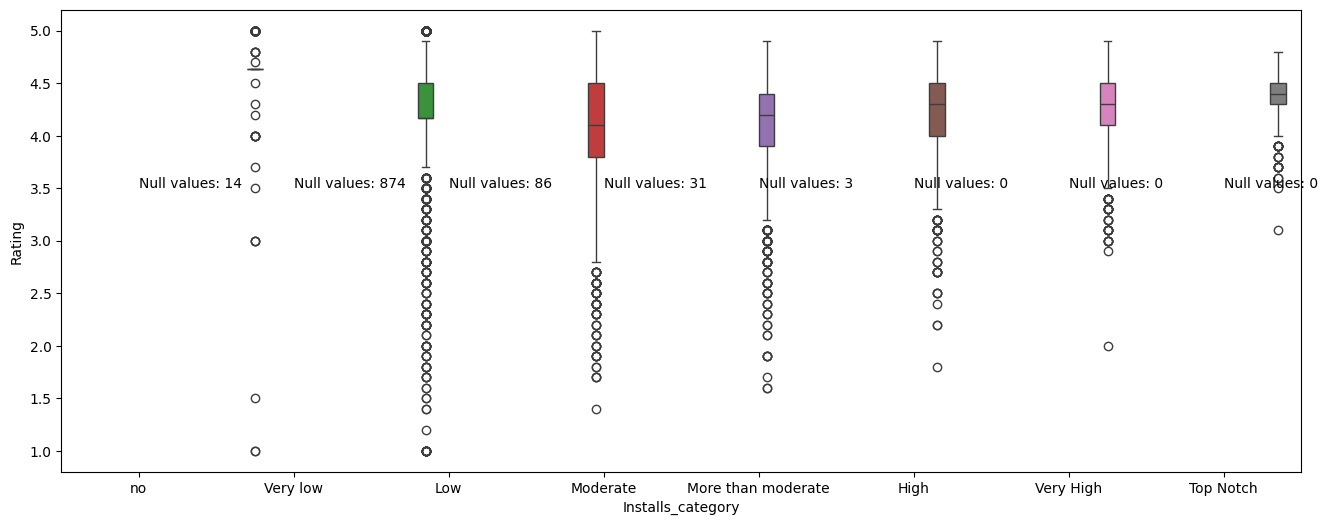

In [64]:
# plot the boxplot of Rating in each Installs_category
plt.figure(figsize = (16, 6)) # make figure size
sns.boxplot(x = "Installs_category", y = "Rating", hue='Installs_category', data = df) # plot the boxplot of Rating in each Installs_category
# Add the text of number of null values in each category
plt.text(0, 3.5, "Null values: 14")
plt.text(1, 3.5, "Null values: 874")
plt.text(2, 3.5, "Null values: 86")
plt.text(3, 3.5, "Null values: 31")
plt.text(4, 3.5, "Null values: 3")
plt.text(5, 3.5, "Null values: 0")
plt.text(6, 3.5, "Null values: 0")
plt.text(7, 3.5, "Null values: 0")

- Let's check if there is any similar link with Reviews as well

In [65]:
# In which Install_category the Rating has NaN values
df['Installs_category'].loc[ df['Reviews'].isnull()].value_counts()

Installs_category
no                    0
Very low              0
Low                   0
Moderate              0
More than moderate    0
High                  0
Very High             0
Top Notch             0
Name: count, dtype: int64

- There are no Null values in Reviews

<Axes: xlabel='Installs_category', ylabel='Reviews'>

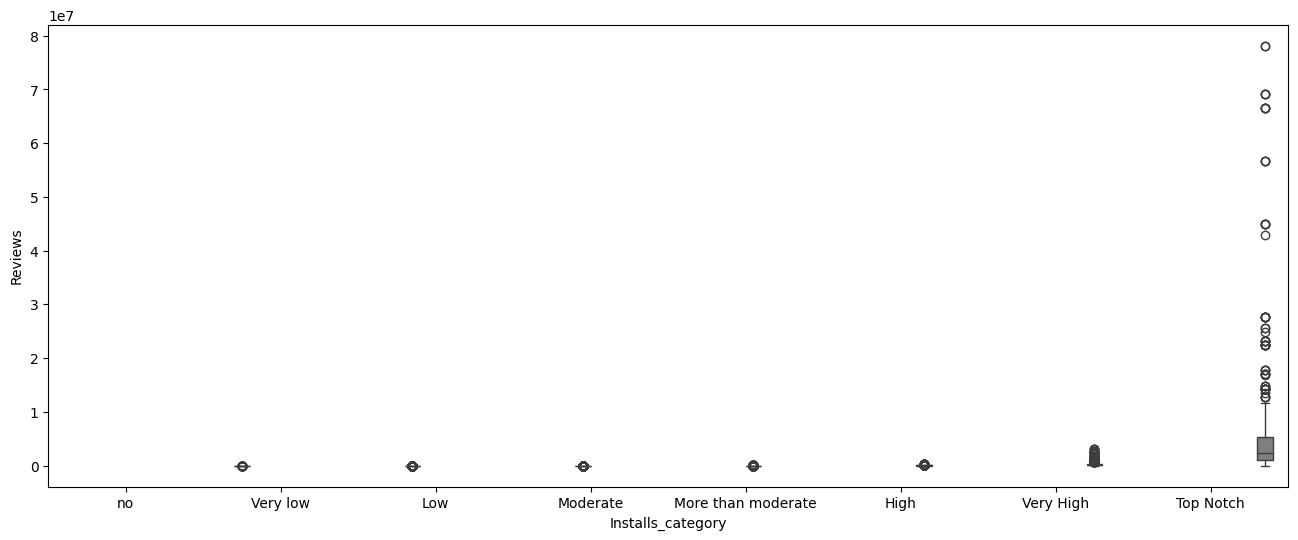

In [66]:
# let's plot the same plots for Reviews column as well
plt.figure(figsize = (16, 6)) # make figure size
sns.boxplot(x = "Installs_category", y = "Reviews", hue="Installs_category", data =df) # plot the boxplot of Reviews in each Installs_category


- The data looks really imbalance, let's normalize the data using log Transformation

<Axes: xlabel='Installs_category', ylabel='Reviews'>

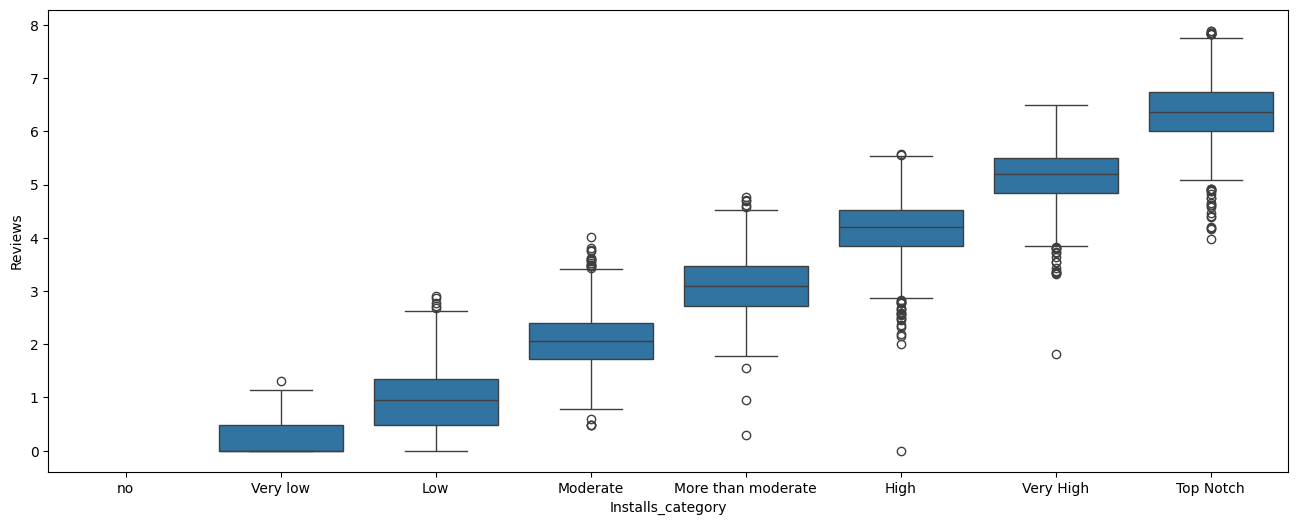

In [67]:
# let's plot the same plots for Reviews column as well
plt.figure (figsize = (16, 6)) # make figure size
sns.boxplot ( x = "Installs_category", y = np.log10(df["Reviews"]), data=df) # plot the boxplot of Reviews in each Installs_category

- We also draw the scatter plot of the `Rating` and `Review` columns with the `Installs` column

<Axes: xlabel='Rating', ylabel='Reviews'>

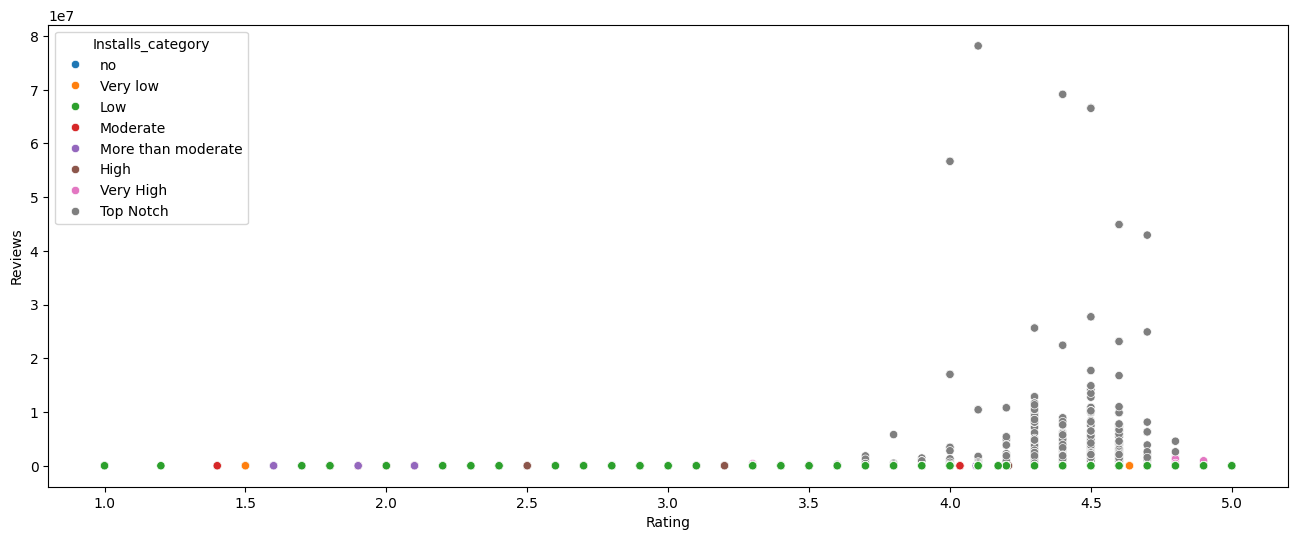

In [68]:
# Draw a scatter plot between Rating and Reviews and Installs
plt.figure(figsize = (16, 6)) # make figure size
sns.scatterplot( x = 'Rating', y = 'Reviews', hue="Installs_category", data = df) # plot the scatter plot of Rating and Reviews and Installs_category

- It doesn't show any trend, because, you should know that Rating is a categorical variable (ordinal) and Reviews is a continuous variable, therefore, we can not plot them together.
- Let's try with Reviews and Installs

<Axes: xlabel='Reviews', ylabel='Installs'>

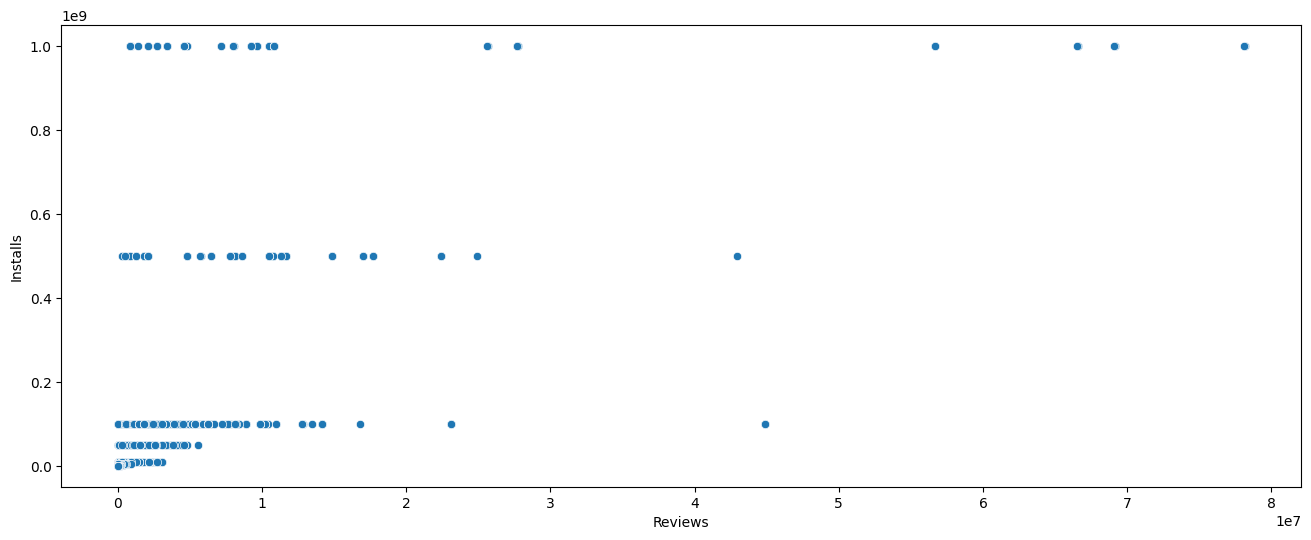

In [69]:
# plot reviews and installs in a scatter plot
plt.figure(figsize = (16, 6)) # make figure size
sns.scatterplot(x = 'Reviews', y = 'Installs', data=df) # plot the scatter plot of Reviews and Installs

- We did not see any trend and the issue is we need to normalize the data before plotting it, let's try with log transformation

<Axes: xlabel='Reviews', ylabel='Installs'>

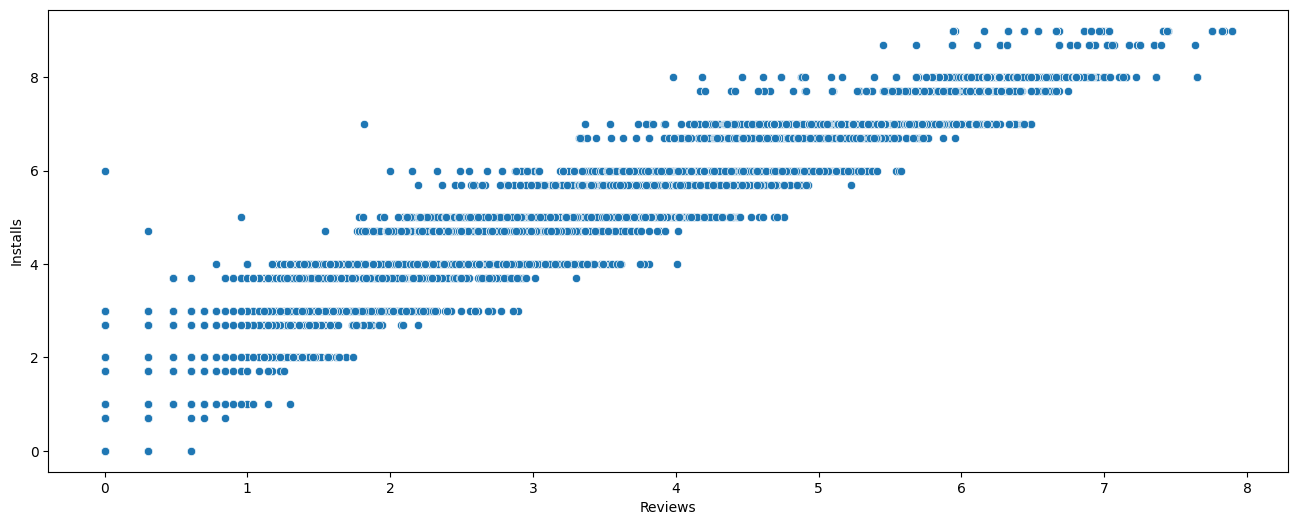

In [70]:
# plot reviews and installs in a scatter plot with log scale
plt.figure(figsize = (16, 6)) # make figure size
sns.scatterplot( x = np.log10(df['Reviews']), y = np.log10(df['Installs']), data =df) # plot the scatter plot of Reviews and Installs

- Now we see a slight trend but still the issue is installs were given in a factorial manner, as 10+, 20+, 1000+ etc, and these are not continuous number but Discreet one, therefore, we can only see a slight trends here.let's plot a line  plot to see the trend.

<Figure size 1600x600 with 0 Axes>

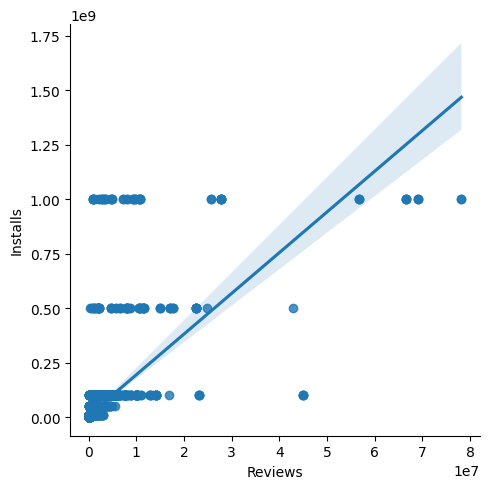

In [71]:
# plot reviews and installs in a scatter plot with trend line
plt.figure(figsize = (16, 6 )) # make figure size
sns.lmplot( x = 'Reviews', y= 'Installs', data = df) # plot the scatter plot of Reviews and Installs with trend line

- Here, we can see a nice trend, which shows that number of Reviews increases with the number of Installs, which is quite obvious.
---
# **Observation**
- We can see that most of the null values from `Rating` column are no - Moderate Installation apps, which make sense that if the app has less installations, it has less Rating and review.
- But wait, we have to check for the duplicates as well, as they can affect our analysis.

---
# 2.3 **Duplicates**
  - Removing duplicates is one of the most important part of the data wrangling process, we must remove the duplicates in order to get the correct insights from the data.
  - If you do not remove duplicates from a dataset, it can lead to incorrect insights and analysis.
  - Duplicates can skew statistical measures such as mean, median, and standard deviation, and can also lead to over-representation of certain data points.
  - It is important to remove duplicate to ensure the accuracy and reliability of your data analysis.

In [72]:
# Find duplicate if any
df.duplicated().sum()

np.int64(483)

This shows us total duplicates, but we can also check based on the app name, as we know that every app has a unique name.

In [73]:
# find duplicate if any in the "App" column
df['App'].duplicated().sum()

np.int64(1181)

- Oops! we have 1181 duplicate app names
- Can we find a column which can help us to remove the duplicate?

Let's chekc for number of duplicates in each column using a for loop and printing the output

In [74]:
# Let's check for number of duplicates
for col in df.columns:
    print(f"Number of duplicates in {col} column are: {df[col].duplicated().sum()}")

Number of duplicates in App column are: 1181
Number of duplicates in Category column are: 10782
Number of duplicates in Rating column are: 10771
Number of duplicates in Reviews column are: 4816
Number of duplicates in Size_in_bytes column are: 10359
Number of duplicates in Installs column are: 10796
Number of duplicates in Type column are: 10813
Number of duplicates in Price column are: 10727
Number of duplicates in Content Rating column are: 10809
Number of duplicates in Genres column are: 10696
Number of duplicates in Last Updated column are: 9440
Number of duplicates in Current Ver column are: 8034
Number of duplicates in Android Ver column are: 10782
Number of duplicates in Size_in_Mb column are: 10359
Number of duplicates in Installs_category column are: 10808


This means that the only better way to find duplicates is to check for whole data

In [75]:
# print the number of duplicates in df
print(f'Number of duplicates in df are:  {df.duplicated().sum()}')

Number of duplicates in df are:  483


- Find and watch all duplicates if they are real!

In [76]:
# Find exact duplicates and print them
df[df['App'].duplicated(keep =False)].sort_values(by = 'App').head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
10116,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,3.8,High
10117,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3984588.8,500000,Free,0.00,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,3.8,High
1566,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,26.0,High
1569,1800 Contacts - Lens Store,MEDICAL,4.7,23160,27262976.0,1000000,Free,0.00,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,26.0,High
2039,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3984588.8,1000,Paid,16.99,Everyone,Medical,27-Jan-17,1.0.5,4.0.3 and up,3.8,Low


- Remove Duplicates

In [77]:
# Remove the duplicates
df.drop_duplicates(inplace = True)

In [78]:
# print the number of rows and columns after removing duplicates
print(f'Number of rows after removing duplicates:  {df.shape[0]}')

Number of rows after removing duplicates:  10332


- Now we have removed 483 duplicates fromt he dataset. and have 10346 rows left.

# **3. Insights from Data**
# **3.1 which category has the highest number of apps?**

In [79]:
# Which category has highest number of apps
df['Category'].value_counts().head(10) # this will show the top 10 categories with highest number of apps

Category
FAMILY             1937
GAME               1121
TOOLS               841
BUSINESS            426
MEDICAL             407
PRODUCTIVITY        406
PERSONALIZATION     385
LIFESTYLE           372
COMMUNICATION       366
FINANCE             358
Name: count, dtype: int64

# **3.2 Which category has the highest number of installs?**

In [80]:
# Category with highest number of Installs
df.groupby('Category')['Installs'].sum().sort_values(ascending =False).head(10)

Category
GAME                  31544024415
COMMUNICATION         24152276251
SOCIAL                12513867902
PRODUCTIVITY          12463091369
TOOLS                 11452271905
FAMILY                10041632405
PHOTOGRAPHY            9721247655
TRAVEL_AND_LOCAL       6361887146
VIDEO_PLAYERS          6222002720
NEWS_AND_MAGAZINES     5393217760
Name: Installs, dtype: int64

# **3.3. Which category has the highest number of reviews?**

In [81]:
# Category with highest number of Reviews
df.groupby('Category')['Reviews'].sum().sort_values(ascending= False).head(10)

Category
GAME               1415536650
COMMUNICATION       601273552
SOCIAL              533576829
FAMILY              396771746
TOOLS               273181033
PHOTOGRAPHY         204297410
VIDEO_PLAYERS       110380188
PRODUCTIVITY        102554498
SHOPPING             94931162
PERSONALIZATION      75192744
Name: Reviews, dtype: int64

# **3.4 which category has the highest rating**

In [82]:
# Category with highest average Rating
df.groupby('Category')['Rating'].mean().sort_values(ascending = False).head(10)

Category
EVENTS                 4.394346
EDUCATION              4.373794
ART_AND_DESIGN         4.367122
BOOKS_AND_REFERENCE    4.358435
PERSONALIZATION        4.333325
GAME                   4.281926
HEALTH_AND_FITNESS     4.273890
SOCIAL                 4.260441
PARENTING              4.259759
SHOPPING               4.253376
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

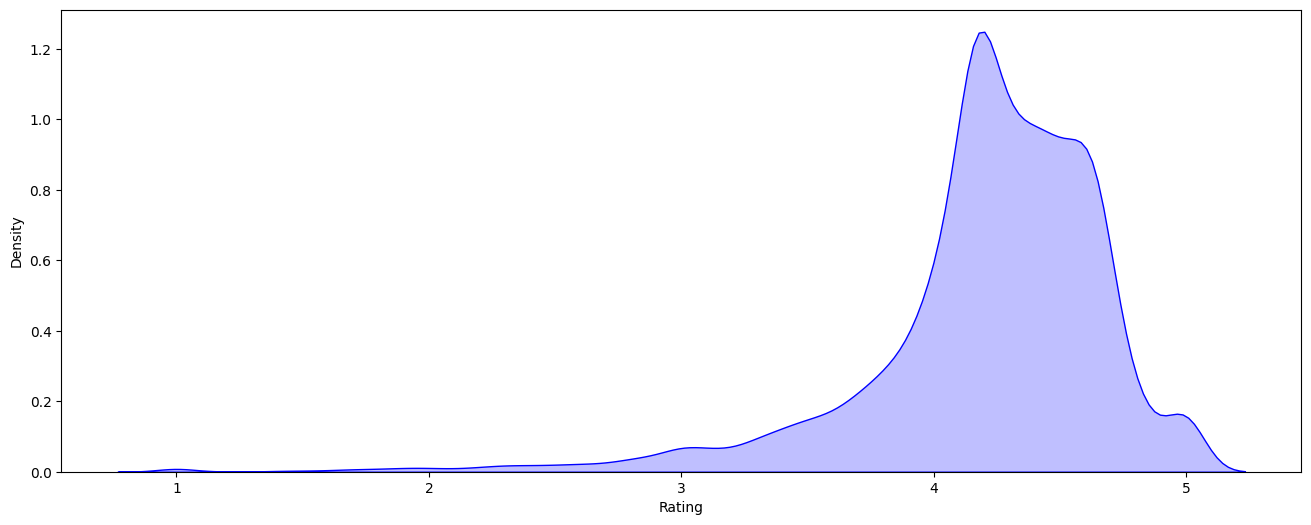

In [83]:
# plot the rating distribution
plt.figure(figsize  = (16, 6)) # make figure size
sns.kdeplot( df['Rating'], color = 'blue', shade = True) # plot the rating distribution plot

---
# Very Important for all

## Assignment:
Make at lease 15 Questions and inpect the data find the answers and plot the graphs

## Assignment Question # 01 Which category has the highest Price

In [84]:
# Category with highest Price
highest_price_in_category = df.groupby('Category')['Price'].mean().sort_values(ascending =False).head(10) # this will show the top 10 categories with highest price
highest_price_in_category

Category
FINANCE                6.912989
LIFESTYLE              5.271183
MEDICAL                2.016437
EVENTS                 1.718594
FAMILY                 1.246696
BOOKS_AND_REFERENCE    0.523013
BUSINESS               0.411479
WEATHER                0.395366
PERSONALIZATION        0.385688
PHOTOGRAPHY            0.379596
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

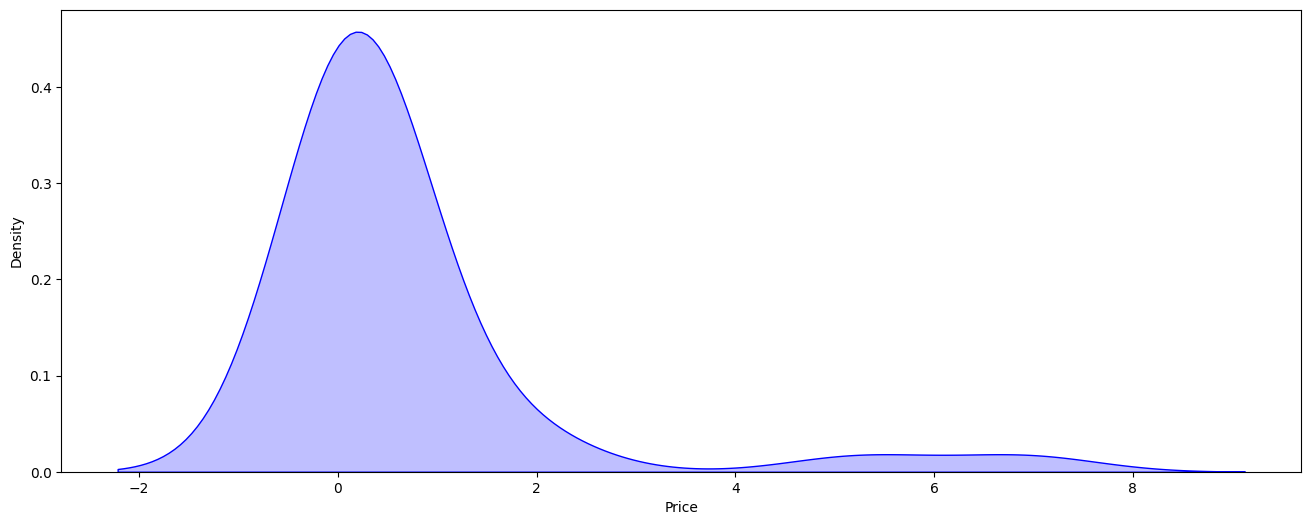

In [85]:
plt.figure(figsize = (16, 6)) # make figure size
sns.kdeplot(df.groupby('Category')['Price'].mean().sort_values(ascending =False), color='blue', shade =True) # plot the highest price in category distribution plot

## Assignment Question # 02 Which category has highest Price

In [86]:
df.groupby('Installs_category')['Price'].mean().sort_values(ascending =False).head(10) # this will show the top 10 categories with highest price

Installs_category
Moderate              2.531941
Low                   1.627661
Very low              1.308518
More than moderate    0.874763
High                  0.046266
Very High             0.008248
Top Notch             0.000000
no                         NaN
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

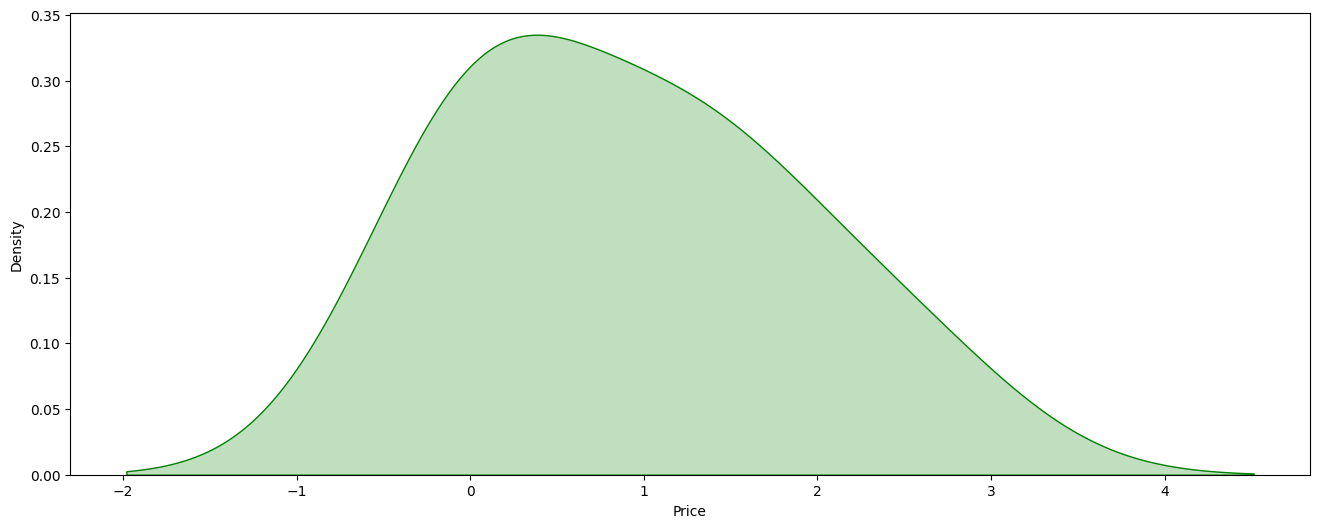

In [87]:
plt.figure( figsize = (16, 6)) # make figure size
sns.kdeplot(df.groupby('Installs_category')['Price'].mean().sort_values(ascending = False), color = 'green', shade =True) # plot the highest price in Installs_category distribution plot

## Assignment Question # 03 Which Content Rating has the Highes Price

In [88]:
df.groupby('Content Rating')['Price'].mean().sort_values(ascending = False).head(10) # this will show the top 10 content Rating with highest price

Content Rating
Everyone           1.025362
Teen               0.561442
Everyone 10+       0.390133
Mature 17+         0.237383
Adults only 18+    0.000000
Unrated            0.000000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

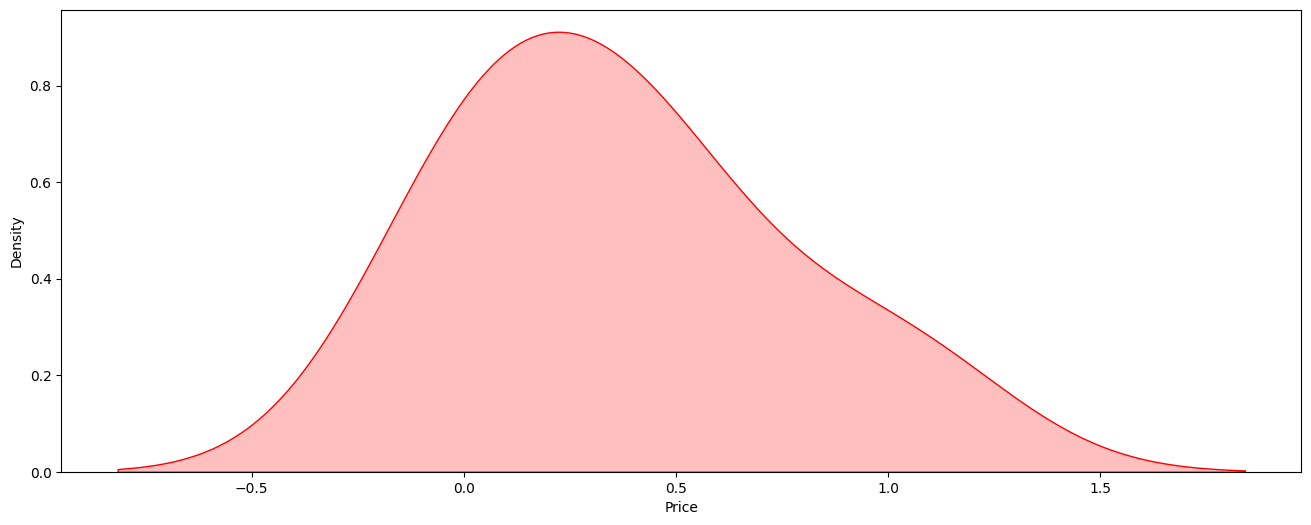

In [89]:
plt.figure( figsize = (16, 6)) # make figure size
sns.kdeplot(df.groupby('Content Rating')['Price'].mean().sort_values(ascending = False), color = 'red', shade = True) # plot the highest price in Content Rating distribution plot

## Assignment Question # 04 Which Installs has highest Price

In [90]:
df.groupby('Installs')['Price'].mean().sort_values(ascending = False).head(10)# this will show the top 10 price with highest installs

Installs
5000      3.027735
1000      2.726543
1         2.675970
10000     2.306887
50000     1.240761
10        1.163464
100       1.128039
5         0.870488
100000    0.721426
50        0.537843
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

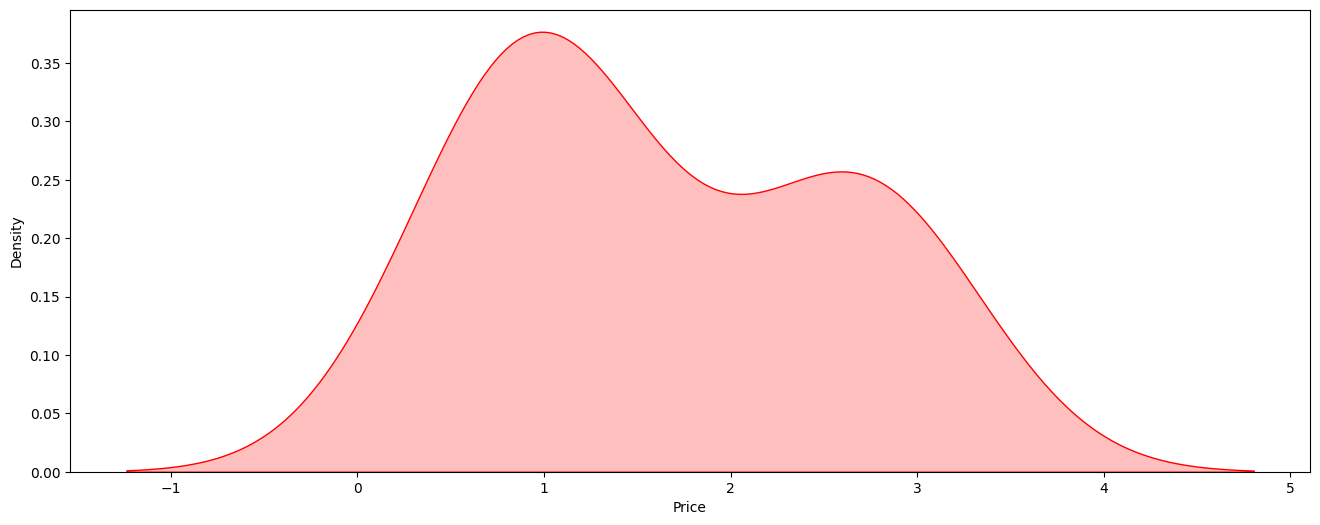

In [91]:
plt.figure( figsize = (16, 6)) # make figure size
sns.kdeplot(df.groupby('Installs')['Price'].mean().sort_values(ascending = False).head(10), color = 'red', shade = True) # plot the highest price in Installs distribution plot

## Assignment Question # 05 Which Category has highest size_in_Mb

In [92]:
df.groupby('Category')['Size_in_Mb'].mean().sort_values(ascending = False).head(10) # this will show the top 10 categories with highest size in Mb


Category
GAME                  44.126816
FAMILY                27.973422
TRAVEL_AND_LOCAL      24.339083
SPORTS                24.180992
ENTERTAINMENT         22.638806
PARENTING             22.512963
FOOD_AND_DRINK        22.056122
HEALTH_AND_FITNESS    21.642819
EDUCATION             20.076632
AUTO_AND_VEHICLES     20.036807
Name: Size_in_Mb, dtype: float64

<Axes: xlabel='Size_in_Mb', ylabel='Density'>

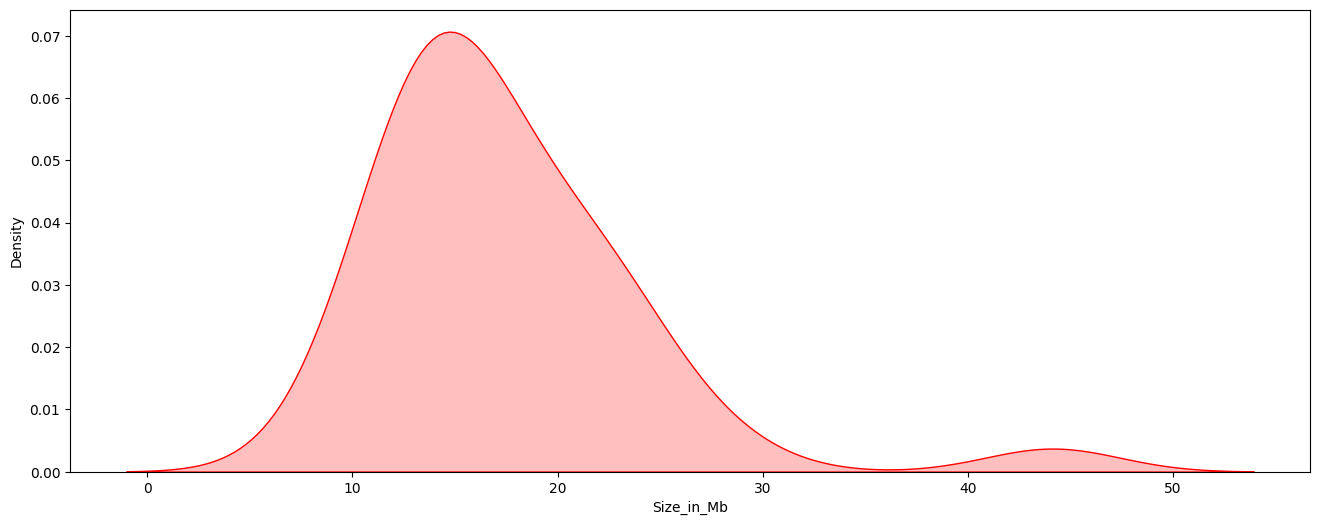

In [93]:
plt.figure( figsize = (16, 6)) # make figure size
sns.kdeplot(df.groupby('Category')['Size_in_Mb'].mean().sort_values(ascending = False), color = 'red', shade = True)

## Assignment Question # 06 Which App has highest Rating

In [94]:
df.groupby('App')['Rating'].mean().sort_values(ascending = False).head(10) # this will show the top 10 apps with highest rating


App
Ek Qissa He Quran Se (Qurani Waqiyat)          5.0
GKPB FP Online Church                          5.0
Galaxies of Hope                               5.0
Wallpapers FN SCAR H                           5.0
Accounting Quiz (AQ) Malaysia                  5.0
Disciple Maker’s (DM) Lab                      5.0
Girls Live Talk - Free Text and Video Chat     5.0
Flippy Axe : Flip The Knife & Axe Simulator    5.0
Florida Beach Wallpapers HD                    5.0
Florida Wildflowers                            5.0
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

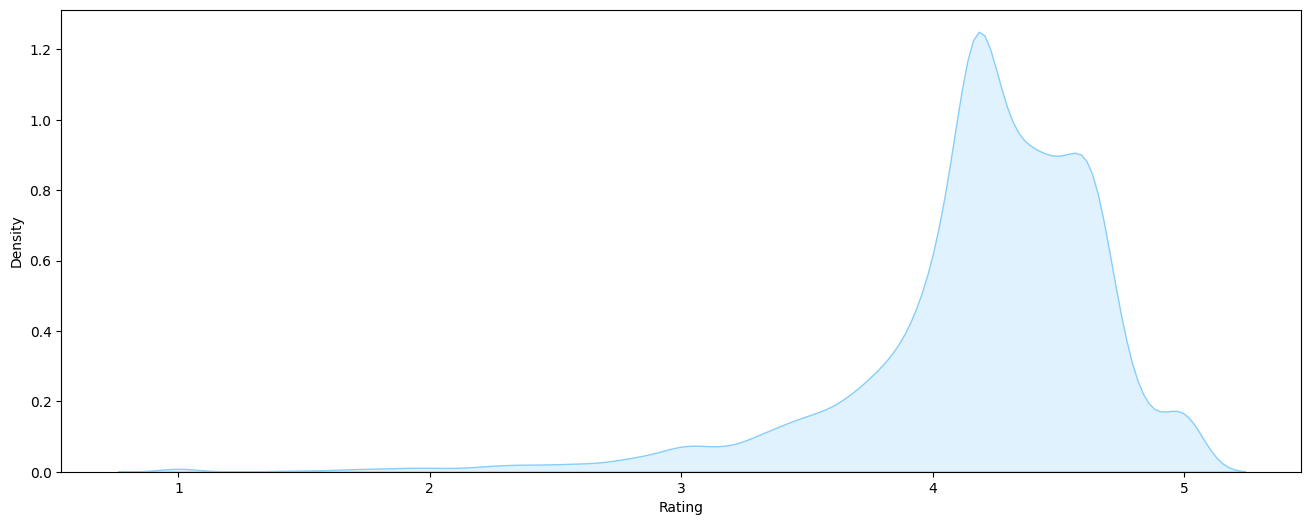

In [95]:
plt.figure( figsize = (16, 6)) # make figure size
sns.kdeplot(df.groupby('App')['Rating'].mean().sort_values(ascending = False), color ='lightskyblue', shade = True) # plot the highest rating in App distribution plot

## Assignment Question # 07 Which App has highest Reviews

In [96]:
df.groupby('App')['Reviews'].mean().sort_values(ascending = False).head(10) # this will show the top 10 apps with highest reviews

App
Facebook                                              7.814326e+07
WhatsApp Messenger                                    6.911449e+07
Instagram                                             6.655489e+07
Messenger – Text and Video Chat for Free              5.664471e+07
Clash of Clans                                        4.488902e+07
Clean Master- Space Cleaner & Antivirus               4.291653e+07
Subway Surfers                                        2.772132e+07
YouTube                                               2.563943e+07
Security Master - Antivirus, VPN, AppLock, Booster    2.490100e+07
Clash Royale                                          2.313257e+07
Name: Reviews, dtype: float64

<Axes: xlabel='Reviews', ylabel='Density'>

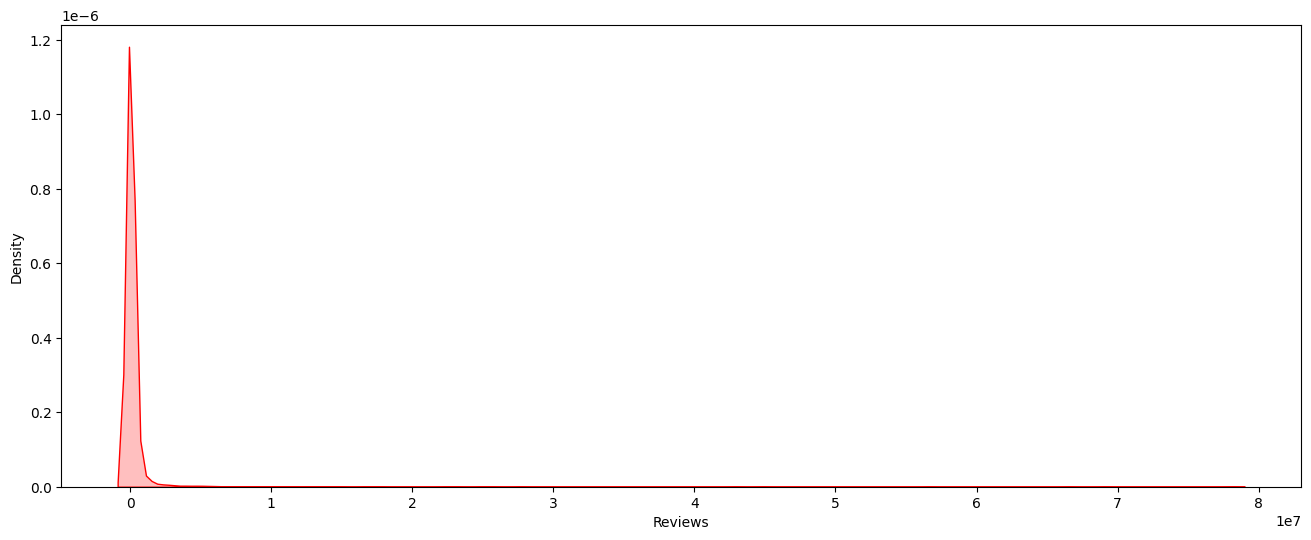

In [97]:
plt.figure(figsize = (16, 6)) # make figure size
sns.kdeplot( df.groupby('App')['Reviews'].mean().sort_values(ascending = False), color = 'red', shade = True) # plot the highest reviews in App distribution plot'

## Assignment Question # 08 Which App has highest Size_in_Mb

In [98]:
df.groupby('App')['Size_in_Mb'].mean().sort_values(ascending = False).head(10) # this will show the top 10 apps with highest Size in Mb

App
Hungry Shark Evolution                              100.0
Talking Babsy Baby: Baby Games                      100.0
Stickman Legends: Shadow Wars                       100.0
SimCity BuildIt                                     100.0
Car Crash III Beam DH Real Damage Simulator 2018    100.0
Vi Trainer                                          100.0
Ultimate Tennis                                     100.0
Gangster Town: Vice District                        100.0
Navi Radiography Pro                                100.0
The Walking Dead: Our World                         100.0
Name: Size_in_Mb, dtype: float64

<Axes: xlabel='Size_in_Mb', ylabel='Density'>

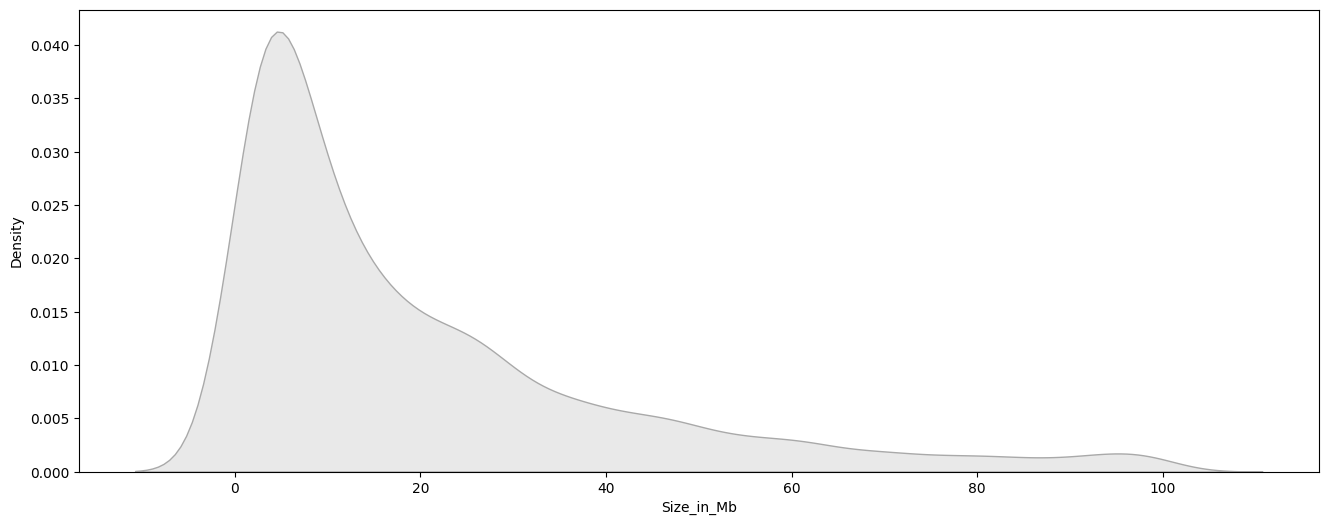

In [99]:
plt.figure( figsize = (16, 6)) # make figure size
sns.kdeplot( df.groupby('App')['Size_in_Mb'].mean().sort_values(ascending = False), color = 'darkgray', shade = True) # plot the highest Size in Mb in App distribution plot

## Assignment Question # 09 Which Genres has highest Price

In [100]:
df.groupby("Genres")['Price'].mean().sort_values(ascending = False).head(10) # this will show the top 10 genres with highest price

Genres
Finance                         6.912989
Lifestyle                       5.285391
Adventure;Brain Games           2.990000
Books & Reference;Creativity    2.990000
Entertainment                   2.836593
Simulation;Education            2.660000
Role Playing;Education          2.490000
Education;Pretend Play          2.437222
Medical                         2.016437
Strategy;Action & Adventure     1.995000
Name: Price, dtype: float64

<Axes: xlabel='Price', ylabel='Density'>

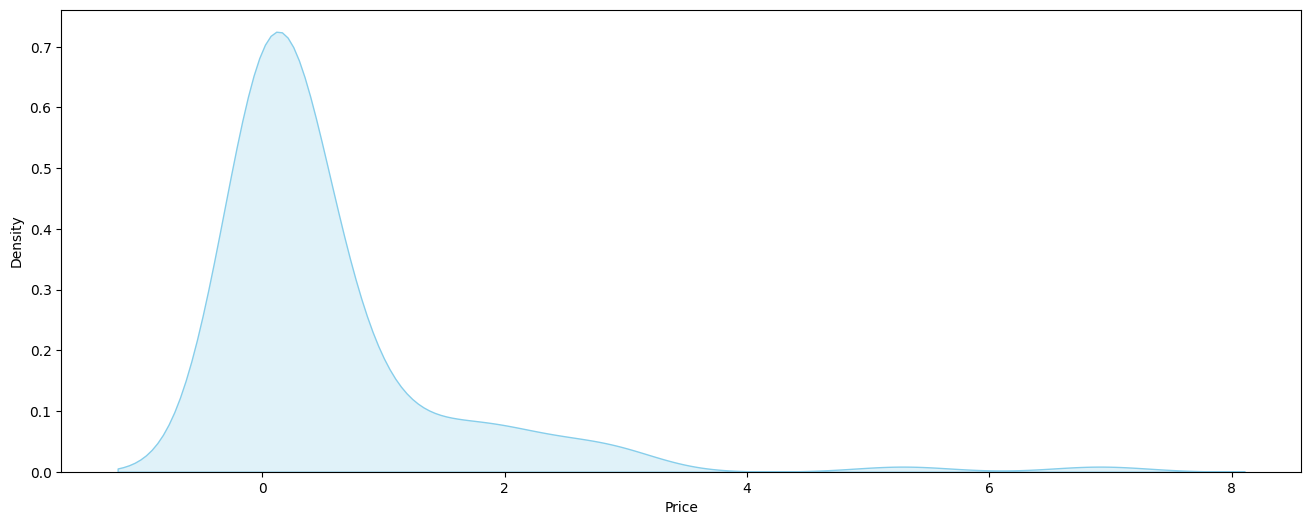

In [101]:
plt.figure ( figsize = (16, 6)) # make figure size
sns.kdeplot( df.groupby( 'Genres')['Price'].mean().sort_values(ascending = False), color = 'skyblue', shade = True) # plot the highest price in Genres distribution plot

## Assignment Question # 10 Which Genres has Highest Size_in_Mb

In [102]:
df.groupby('Genres')['Size_in_Mb'].mean().sort_values(ascending = False).head(10) # this will show the top 10 genres with highest Size in Mb

Genres
Lifestyle;Pretend Play                 100.000000
Adventure;Education                     92.000000
Arcade;Pretend Play                     91.000000
Health & Fitness;Action & Adventure     83.000000
Role Playing;Education                  83.000000
Books & Reference;Creativity            77.000000
Racing;Pretend Play                     73.000000
Racing;Action & Adventure               69.071429
Role Playing;Pretend Play               66.500000
Educational;Creativity                  65.000000
Name: Size_in_Mb, dtype: float64

<Axes: xlabel='Size_in_Mb', ylabel='Density'>

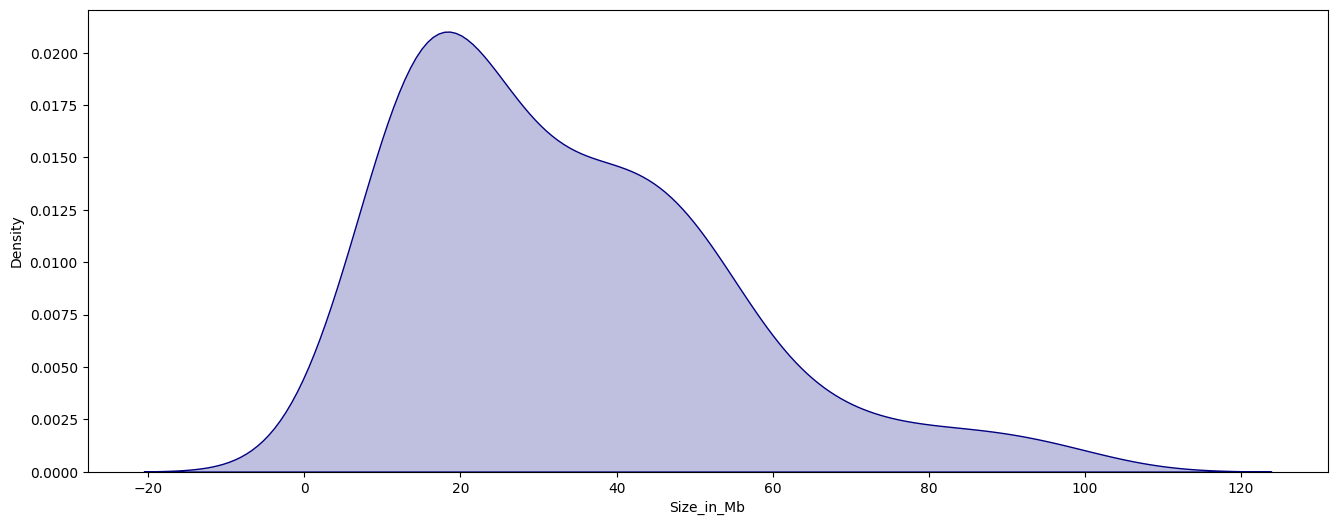

In [103]:
plt.figure ( figsize = (16, 6)) # make figure size
sns.kdeplot( df.groupby( 'Genres')['Size_in_Mb'].mean().sort_values(ascending = False), color =  'navy', shade = True) # plot the highest Size in Mb in Genres distribution plot

## Assignment Question # 11 Which Genres has highest installs

In [104]:
df.groupby('Genres')['Installs'].mean().sort_values(ascending = False).head(10) # this will show the top 10 genres with highest Installs

Genres
Adventure;Action & Adventure    6.970385e+07
Communication                   6.598983e+07
Casual                          4.535513e+07
Social                          4.501391e+07
Arcade                          4.457399e+07
Video Players & Editors         3.587863e+07
Puzzle;Action & Adventure       3.102000e+07
Productivity                    3.069727e+07
Photography                     3.019021e+07
Travel & Local                  2.707143e+07
Name: Installs, dtype: float64

<Axes: xlabel='Installs', ylabel='Density'>

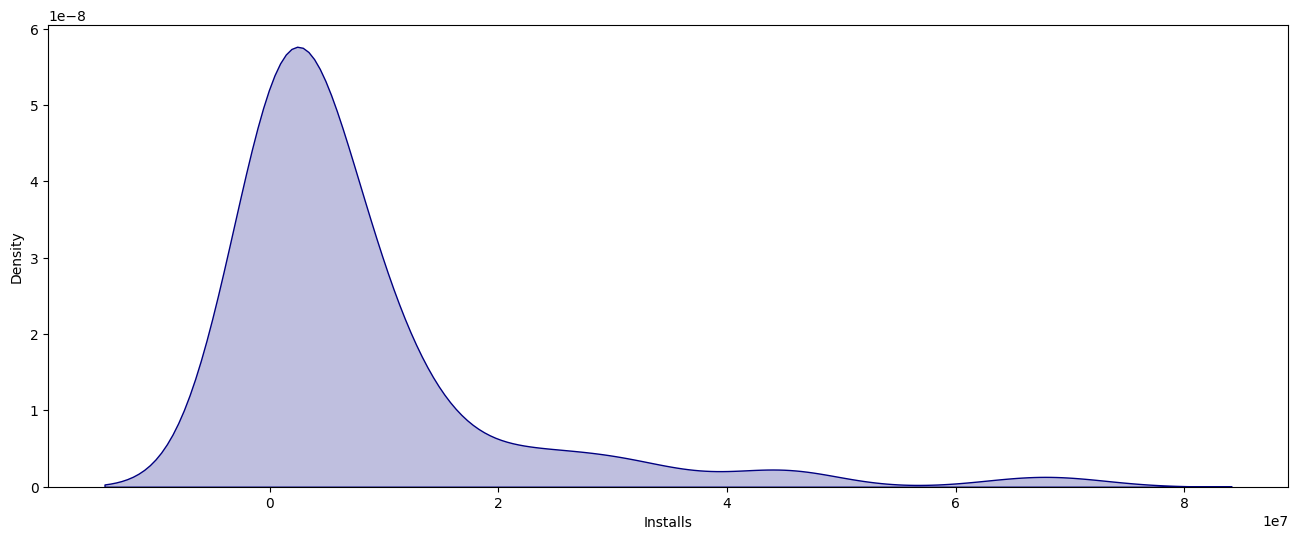

In [105]:
plt.figure( figsize = (16, 6)) # make figure size
sns.kdeplot( df.groupby('Genres')['Installs'].mean().sort_values(ascending = False), color = 'navy', shade = True) # plot the highest Installs in Genres distribution plot

## Assignment Question # 12 Which Type has highest Rating

In [106]:
highest_rating = df.groupby('Type')["Rating"].mean().sort_values(ascending = False) # this will show the top 10 types with highest rating

highest_rating

Type
Paid    4.295511
Free    4.197485
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

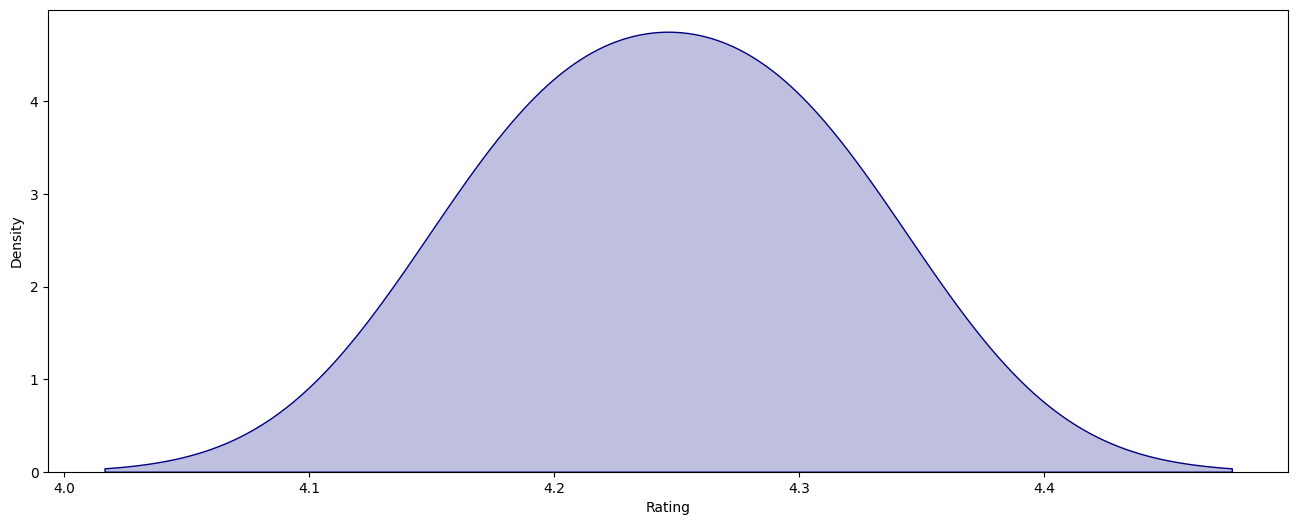

In [107]:
plt.figure (figsize = (16, 6)) # make figure size
sns.kdeplot(highest_rating, color = 'navy' , shade = True) # plot the highest rating in Type distribution plot

## Assignment Question # 13 Which Type has highest Installs

In [108]:
highest_installs = df.groupby('Type')['Installs'].mean().sort_values(ascending = False) # this will show the top 10 types with highest Installs

highest_installs

Type
Free    1.529866e+07
Paid    9.198786e+04
Name: Installs, dtype: float64

<Axes: xlabel='Installs', ylabel='Density'>

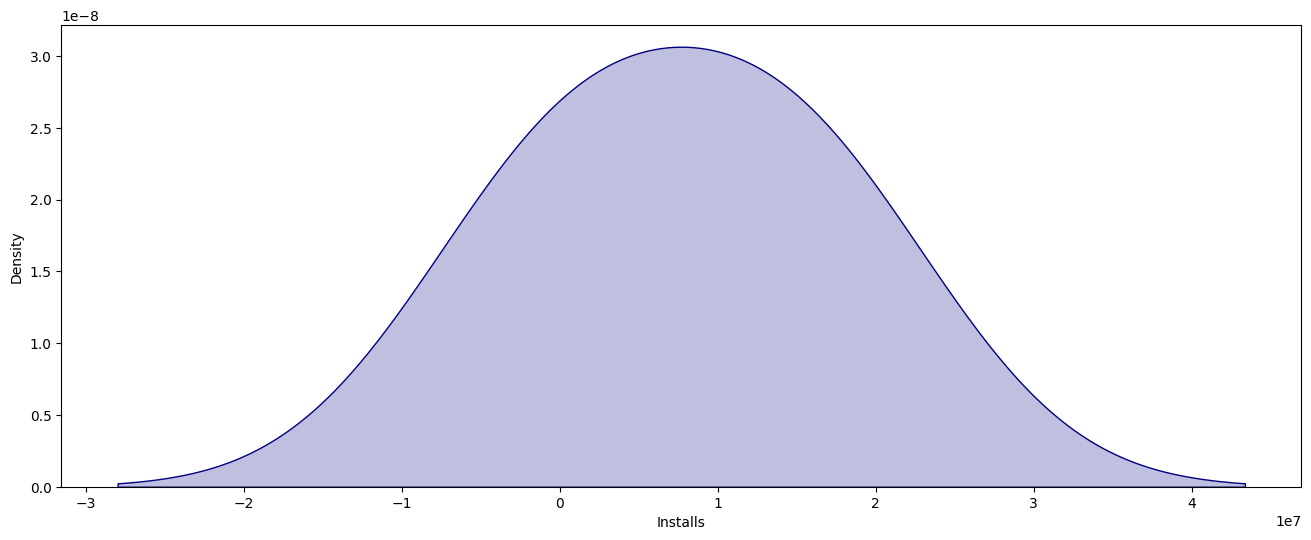

In [109]:
plt.figure( figsize = (16, 6)) # make figure size
sns.kdeplot( highest_installs, color = 'navy', shade = True) # plot the highest Installs in Type distribution plot

## Assignment Question # 14 Which Content Rating has highest Rating

In [110]:
highest_rating  = df.groupby('Content Rating')['Rating'].mean().sort_values(ascending = False) # this will show the content rating with highest rating

highest_rating

Content Rating
Adults only 18+    4.300000
Everyone 10+       4.254296
Teen               4.246241
Everyone           4.200097
Mature 17+         4.140558
Unrated            4.135485
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

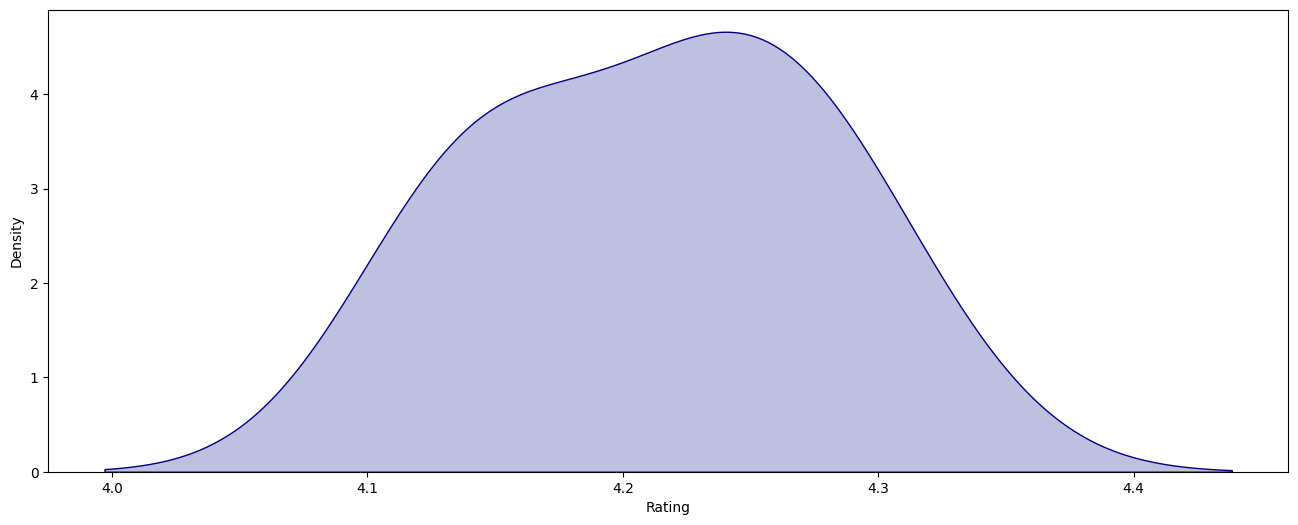

In [111]:
plt.figure( figsize = (16, 6)) # make figure size
sns.kdeplot(highest_rating, color = 'navy', shade = True) # plot the highest rating in Content Rating distribution plot

## Assignment Question # 15 Which Installs category has highest Rating

In [112]:
highest_rating = df.groupby( 'Installs_category')['Rating'].mean().sort_values(ascending = False) # this will show installs category with highest rating

highest_rating

Installs_category
Very low              4.637037
Top Notch             4.372170
Very High             4.285675
High                  4.207101
Low                   4.170422
More than moderate    4.094626
Moderate              4.031585
no                         NaN
Name: Rating, dtype: float64

<Axes: xlabel='Rating', ylabel='Density'>

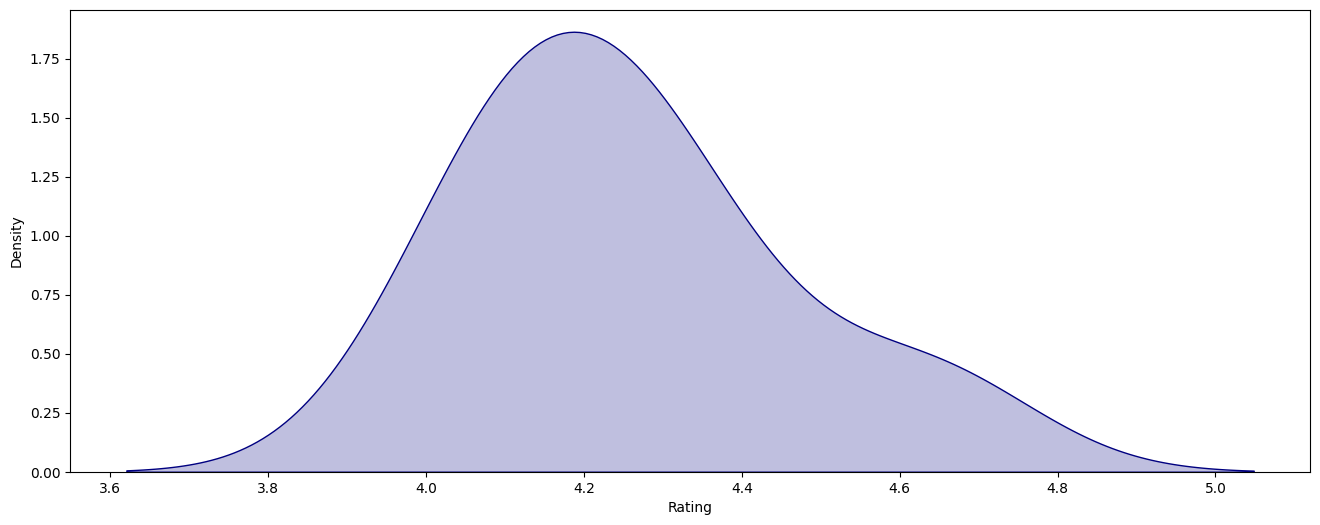

In [113]:
plt.figure ( figsize = (16, 6)) # make figure size

sns.kdeplot( highest_rating, color = 'navy', shade = True) # plo the highest rating in stalls_category distribution plot 

Second Assignment Completed

In [114]:
df.head(20)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
15,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,NaN,1000000000,Free,0.0,Teen,Video Players & Editors,6-Aug-18,Varies with device,Varies with device,NaN,Top Notch
16,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch
17,Google News,NEWS_AND_MAGAZINES,3.9,877635,13631488.0,1000000000,Free,0.0,Teen,News & Magazines,1-Aug-18,5.2.0,4.4 and up,13.0,Top Notch
19,Google News,NEWS_AND_MAGAZINES,3.9,877643,13631488.0,1000000000,Free,0.0,Teen,News & Magazines,1-Aug-18,5.2.0,4.4 and up,13.0,Top Notch
20,Google News,NEWS_AND_MAGAZINES,3.9,878065,13631488.0,1000000000,Free,0.0,Teen,News & Magazines,1-Aug-18,5.2.0,4.4 and up,13.0,Top Notch
21,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,NaN,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device,NaN,Top Notch
22,Hangouts,COMMUNICATION,4.0,3419249,NaN,1000000000,Free,0.0,Everyone,Communication,21-Jul-18,Varies with device,Varies with device,NaN,Top Notch
23,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,NaN,1000000000,Free,0.0,Everyone,Communication,1-Aug-18,Varies with device,Varies with device,NaN,Top Notch
24,Hangouts,COMMUNICATION,4.0,3419433,NaN,1000000000,Free,0.0,Everyone,Communication,21-Jul-18,Varies with device,Varies with device,NaN,Top Notch
25,Hangouts,COMMUNICATION,4.0,3419513,NaN,1000000000,Free,0.0,Everyone,Communication,21-Jul-18,Varies with device,Varies with device,NaN,Top Notch


# Examples

<Axes: xlabel='Installs', ylabel='Price'>

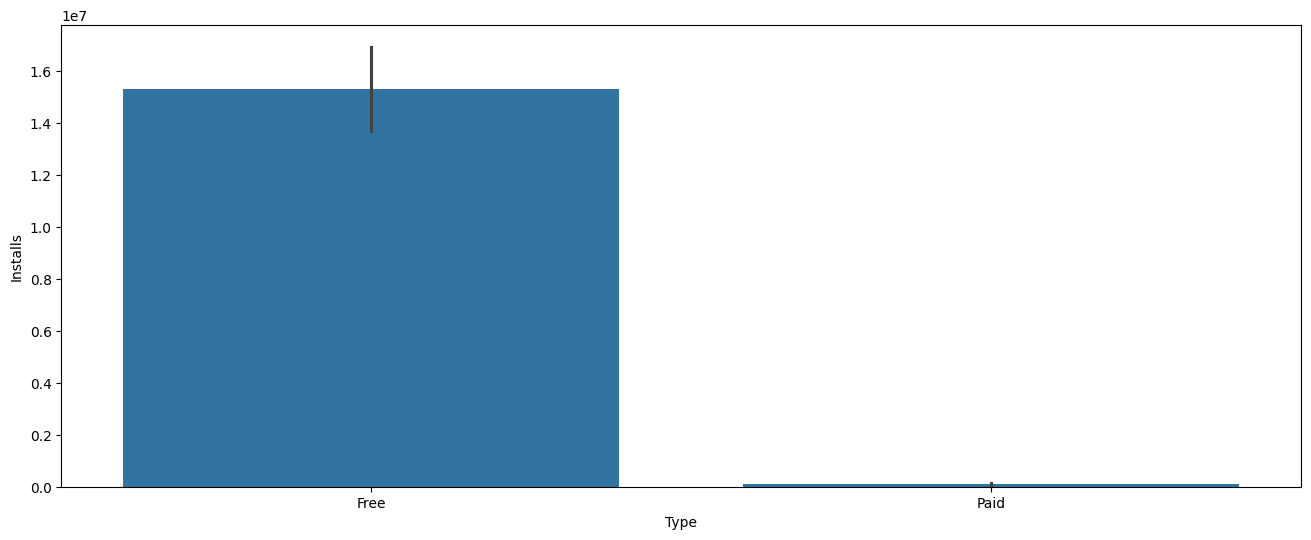

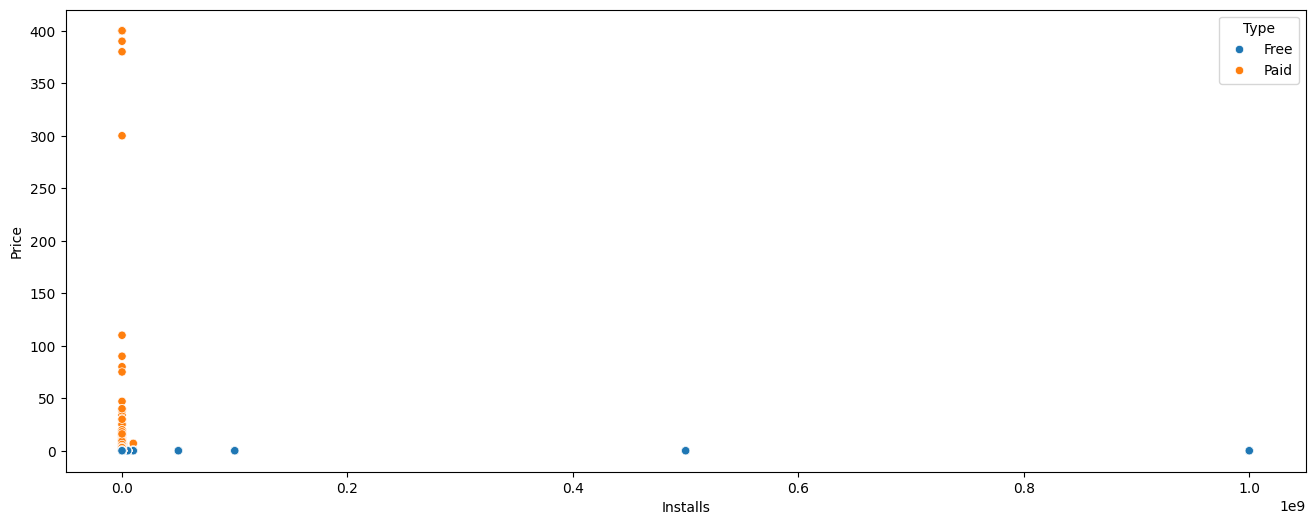

In [115]:
# plot number of installs for free vs paid apps make a bar plot
plt.figure( figsize = (16, 6)) # make figure size
sns.barplot( x = 'Type', y = 'Installs', data =df) # plot the bar plot

# show scatter plot as well where x-axis is Installs and y-axis is Price and hue is Type
plt.figure(figsize = (16, 6)) # make figure size
sns.scatterplot( x  = 'Installs', y  = 'Price', hue = 'Type', data = df) # plot the scatter plot

<Axes: xlabel='Installs_category', ylabel='Size_in_Mb'>

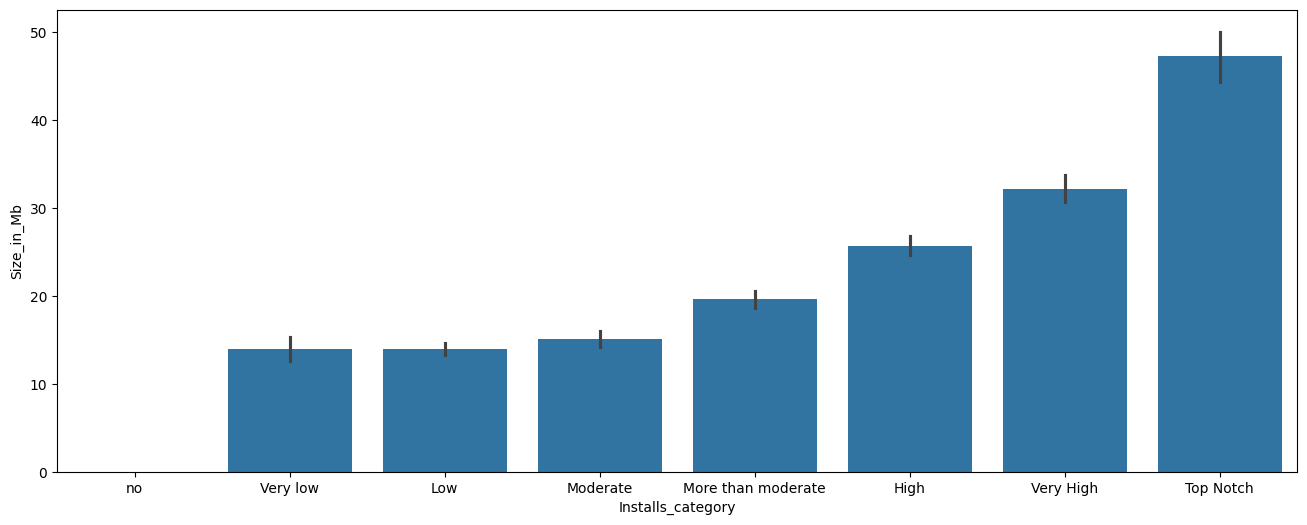

In [116]:
# Check if there is any impact of size on installs
# make a bar plot of Size_in_Mb vs Installs_category
plt.figure(figsize = (16, 6)) # make figure size
sns.barplot( x = "Installs_category", y = "Size_in_Mb", data = df) # plot the bar plot

In [117]:
# which content rating is most popular in installs
df['Content Rating'].value_counts() # this will show the value counts of each content rating

Content Rating
Everyone           8360
Teen               1144
Mature 17+          447
Everyone 10+        376
Adults only 18+       3
Unrated               2
Name: count, dtype: int64

<Axes: xlabel='Content Rating', ylabel='Installs'>

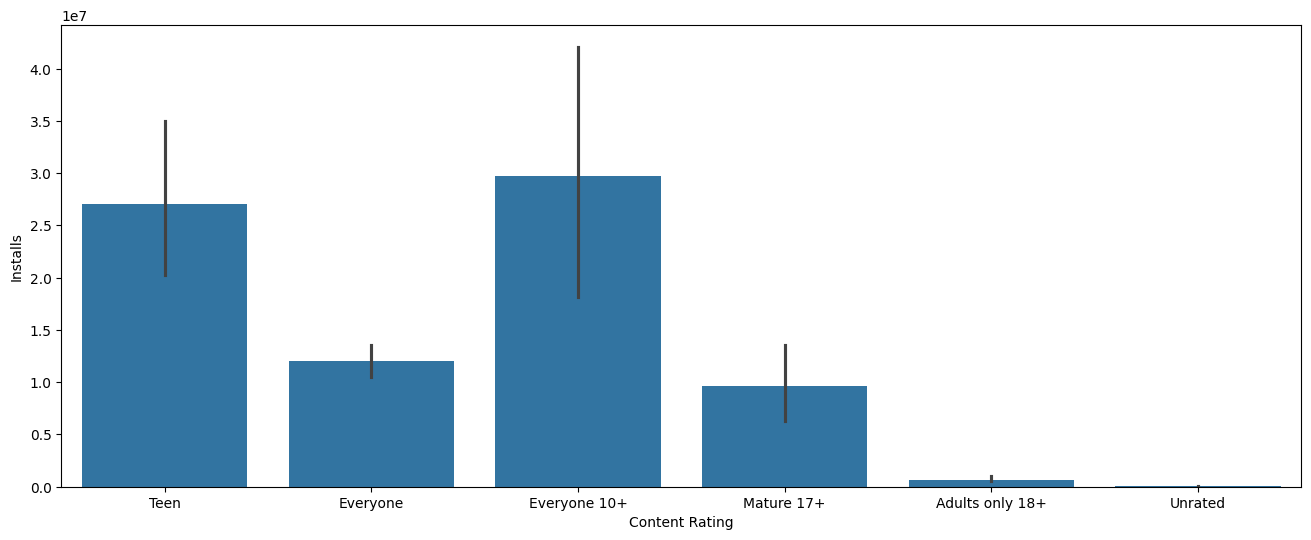

In [118]:
# plot the bar plot of content Rating vs Installs
plt.figure(figsize = (16, 6)) # make figure size
sns.barplot( x = 'Content Rating', y = 'Installs', data = df) # plot the bar plot


In [119]:
# Find how many apps are there in Everyone content rating
df['Category'].loc[ df['Content Rating'] == 'Everyone'].value_counts()

Category
FAMILY                 1496
TOOLS                   833
GAME                    595
BUSINESS                411
PRODUCTIVITY            395
MEDICAL                 389
FINANCE                 353
LIFESTYLE               336
COMMUNICATION           325
SPORTS                  318
PERSONALIZATION         317
PHOTOGRAPHY             307
HEALTH_AND_FITNESS      275
TRAVEL_AND_LOCAL        229
BOOKS_AND_REFERENCE     200
SHOPPING                183
NEWS_AND_MAGAZINES      167
VIDEO_PLAYERS           146
MAPS_AND_NAVIGATION     133
EDUCATION               121
FOOD_AND_DRINK          114
SOCIAL                   98
LIBRARIES_AND_DEMO       84
AUTO_AND_VEHICLES        83
HOUSE_AND_HOME           78
WEATHER                  78
ART_AND_DESIGN           59
PARENTING                58
EVENTS                   53
BEAUTY                   45
ENTERTAINMENT            37
COMICS                   26
DATING                   18
Name: count, dtype: int64

<Axes: xlabel='App', ylabel='Rating'>

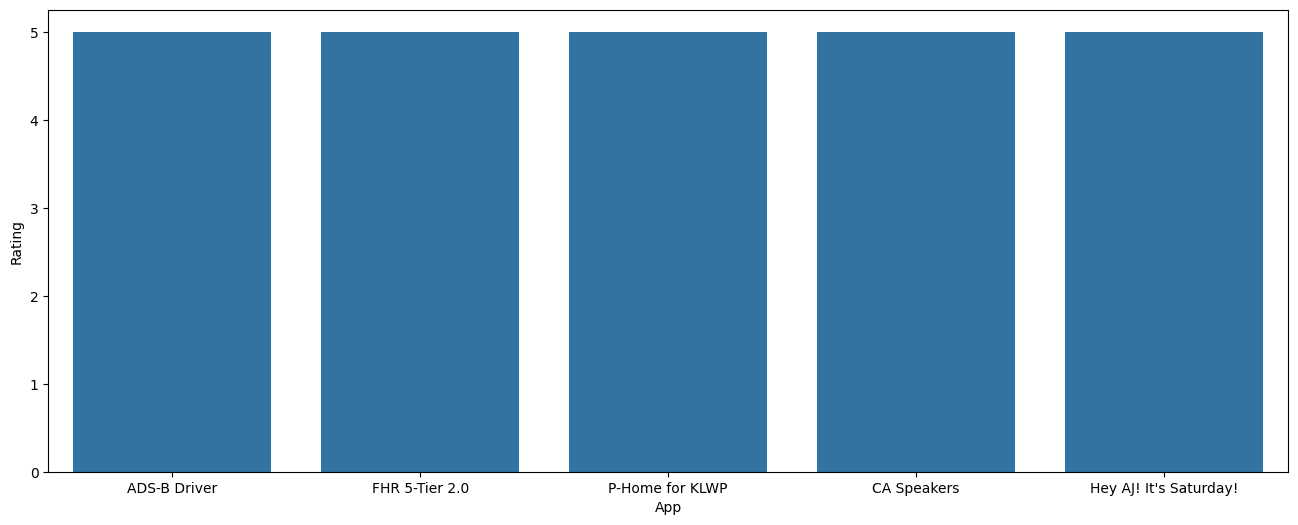

In [120]:
# plot top 5 rated paid apps
plt.figure(figsize = (16, 6)) # make figure size
sns.barplot( x = 'App', y = 'Rating', data = df[ df['Type'] == 'Paid'].sort_values(by = 'Rating', ascending=False).head(5)) # plot the bar plot of top 5 rated paid apps

In [121]:
df[ df['Type'] == 'Paid'].sort_values(by= 'Rating', ascending =False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
7103,ADS-B Driver,TOOLS,5.0,2,6606028.8,100,Paid,1.99,Everyone,Tools,15-May-18,1.19,4.4 and up,6.3,Low
10686,FHR 5-Tier 2.0,MEDICAL,5.0,2,1258291.2,500,Paid,2.99,Everyone,Medical,16-Dec-15,1,4.0 and up,1.2,Low
7104,P-Home for KLWP,PERSONALIZATION,5.0,4,12582912.0,100,Paid,0.99,Everyone,Personalization,15-May-18,v2018.May.15.14,5.0 and up,12.0,Low
7135,CA Speakers,LIFESTYLE,5.0,12,1258291.2,100,Paid,0.99,Teen,Lifestyle,25-Mar-14,1,3.0 and up,1.2,Low
7112,Hey AJ! It's Saturday!,BOOKS_AND_REFERENCE,5.0,12,52428800.0,100,Paid,3.99,Everyone,Books & Reference,13-Jun-16,1.0.0,2.2 and up,50.0,Low


<Axes: xlabel='App', ylabel='Rating'>

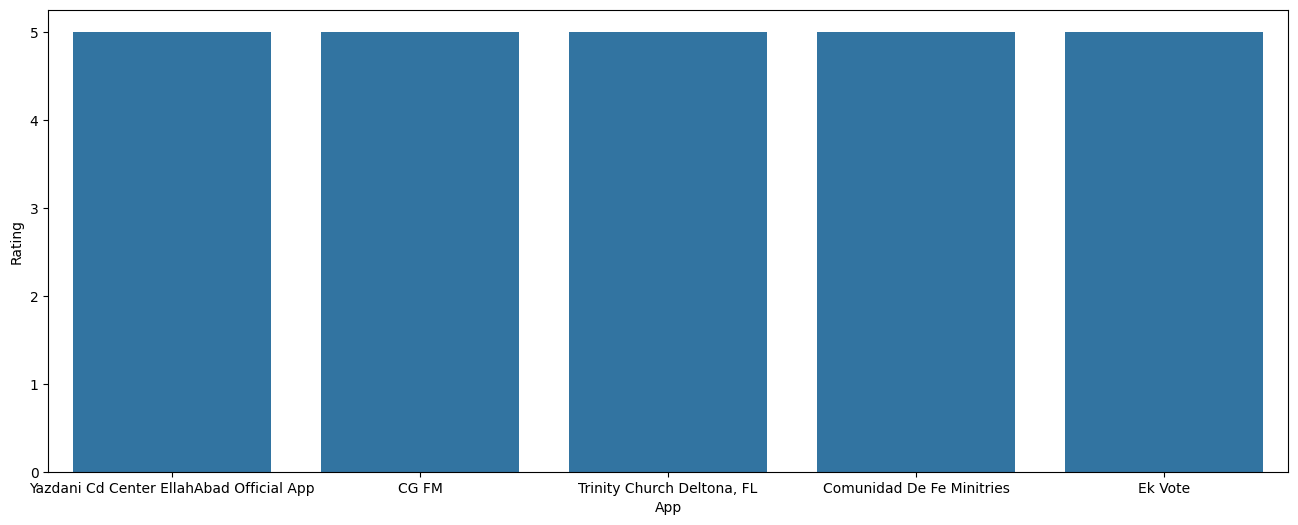

In [122]:
# plot top rated 5 apps in free category
plt.figure( figsize = (16, 6)) # make figure size
sns.barplot( x = 'App', y='Rating', data= df[ df['Type'] == 'Free'].sort_values( by = 'Rating', ascending = False).head(5)) # plot the bar plot of top 5 rated free apps

In [123]:
df[ df['Type'] == 'Free'].sort_values(by = 'Rating', ascending =False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
10695,Yazdani Cd Center EllahAbad Official App,FAMILY,5.0,8,3984588.8,500,Free,0.0,Everyone,Entertainment,12-Jan-18,2,4.0 and up,3.8,Low
10696,CG FM,FAMILY,5.0,2,6920601.6,500,Free,0.0,Everyone,Entertainment,31-Jan-18,1.0.9,4.1 and up,6.6,Low
10710,"Trinity Church Deltona, FL",LIFESTYLE,5.0,33,29360128.0,500,Free,0.0,Everyone,Lifestyle,7-May-18,1.9.0.0,2.3.3 and up,28.0,Low
10709,Comunidad De Fe Minitries,LIFESTYLE,5.0,19,11534336.0,500,Free,0.0,Everyone,Lifestyle,1-Mar-18,1.1,4.1 and up,11.0,Low
10706,Ek Vote,PRODUCTIVITY,5.0,43,6501171.2,500,Free,0.0,Everyone,Productivity,7-Nov-17,1.1,4.0.3 and up,6.2,Low


<Axes: xlabel='App', ylabel='Reviews'>

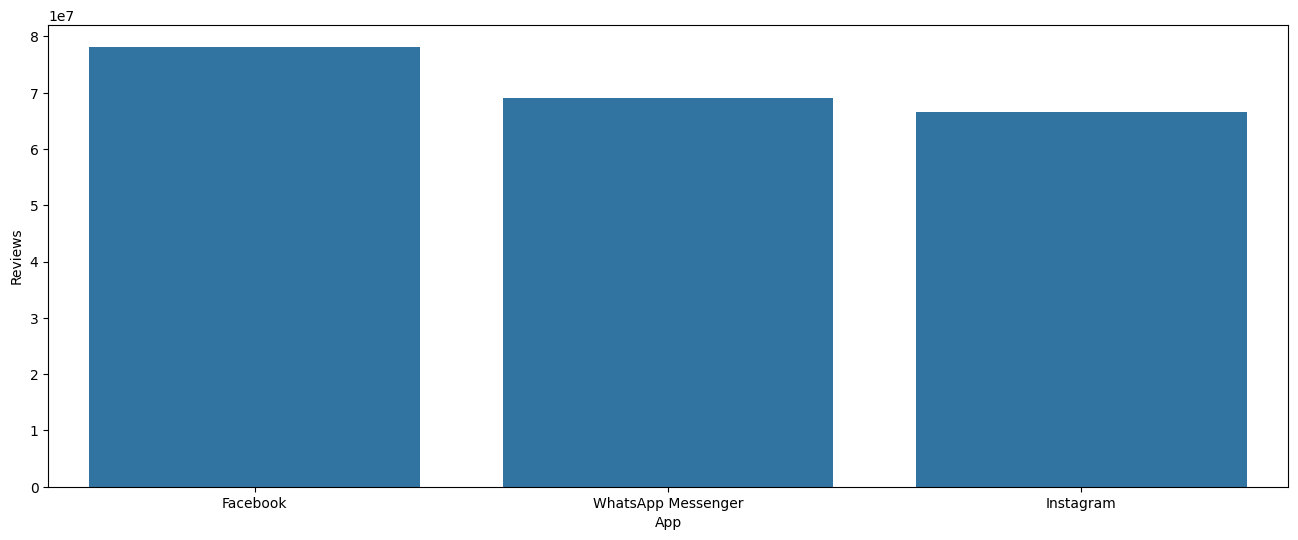

In [124]:
# Plot top 5 FREE apps with highest number of reviews
plt.figure(figsize = (16, 6)) # make figure size
sns.barplot( x = "App", y = "Reviews", data = df[ df['Type'] == 'Free'].sort_values(by = 'Reviews', ascending = False).head(5))

In [125]:
df [ df['Type'] == 'Free'].sort_values(by = 'Reviews', ascending = False).head(5)

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Installs_category
30,Facebook,SOCIAL,4.1,78158306,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch
31,Facebook,SOCIAL,4.1,78128208,NaN,1000000000,Free,0.0,Teen,Social,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch
50,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch
56,WhatsApp Messenger,COMMUNICATION,4.4,69109672,NaN,1000000000,Free,0.0,Everyone,Communication,3-Aug-18,Varies with device,Varies with device,NaN,Top Notch
65,Instagram,SOCIAL,4.5,66577446,NaN,1000000000,Free,0.0,Teen,Social,31-Jul-18,Varies with device,Varies with device,NaN,Top Notch


<Axes: xlabel='App', ylabel='Reviews'>

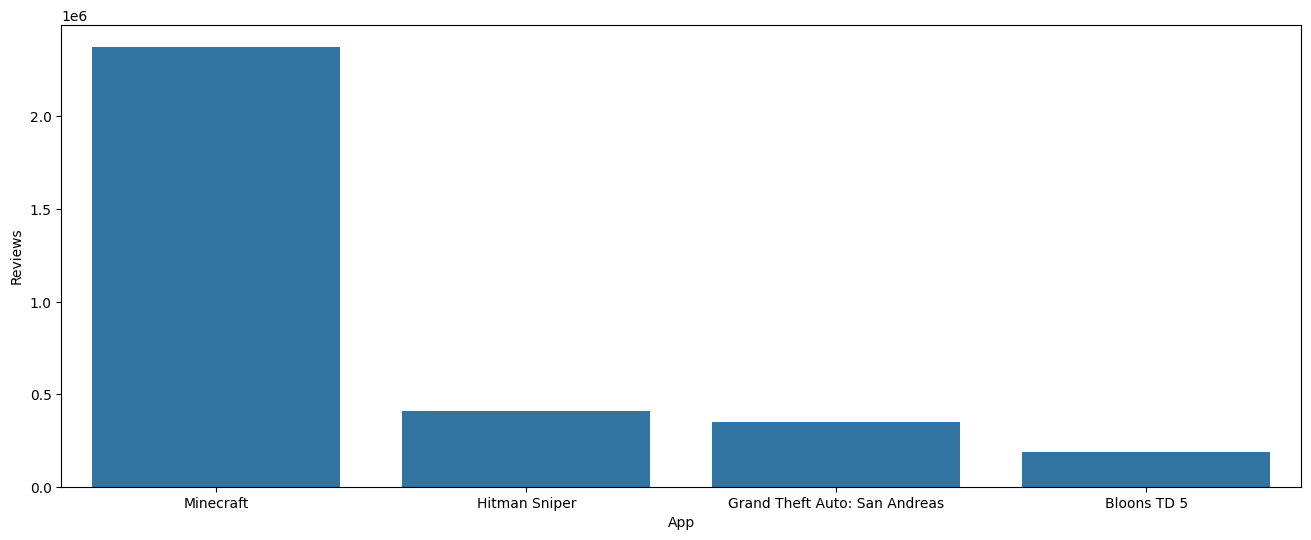

In [126]:
# plot top 5 paid apps with highest number of reviews
plt.figure( figsize = (16, 6)) # make figure size
sns.barplot(x = 'App', y = 'Reviews', data = df[ df['Type'] == 'Paid'].sort_values(by='Reviews', ascending = False).head(5))

-- Good Luck and Go Head!

---

- After Finishing this assignment, please make a complete project on one of the following Datasets:

# Google PlayStore Apps Big Data

[Link to Download the data](https://www.kaggle.com/datasets/gauthamp10/google-playstore-apps?select=Google-Playstore.csv)

### Google PlayStore Android App Data (2.3 Million+ App Data)

also checkout:

Apple AppStore Apps dataset: [Link](https://www.kaggle.com/datasets/gauthamp10/apple-appstore-apps)

Android App Permission dataset: [Link](https://www.kaggle.com/datasets/gauthamp10/app-permissions-android)